In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.special import boxcox1p
import scipy.stats as stat
from scipy.stats import norm
from matplotlib import pylab

In [20]:
import numpy as np
import scipy.stats as stat

cloud3pm = 10
cloud3pm = np.where(cloud3pm>8,8,cloud3pm)

pressure3pm = np.array([1200,100])
print(pressure3pm)
pressure3pm,_=stat.boxcox(pressure3pm)

print(cloud3pm)
print(pressure3pm[0])

[1200  100]
8
7.090153874521492


In [2]:
df = pd.read_csv('rain.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# we can see few null values columns and also various data types

In [7]:
df.describe(include='all')

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       145460    145460  143975.000000  144199.000000  142199.000000   
unique        3436        49            NaN            NaN            NaN   
top     2016-06-08  Canberra            NaN            NaN            NaN   
freq            49      3436            NaN            NaN            NaN   
mean           NaN       NaN      12.194034      23.221348       2.360918   
std            NaN       NaN       6.398495       7.119049       8.478060   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.900000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  \
count   82670.000000  75625.000000      135134  135197.000000     134894   
unique           NaN           NaN          16            NaN         16   
top              NaN           NaN           W            NaN          N   
freq             NaN           NaN        9915            NaN      11758   
mean        5.468232      7.611178         NaN      40.035230        NaN   
std         4.193704      3.785483         NaN      13.607062        NaN   
min         0.000000      0.000000         NaN       6.000000        NaN   
25%         2.600000      4.800000         NaN      31.000000        NaN   
50%         4.800000      8.400000         NaN      39.000000        NaN   
75%         7.400000     10.600000         NaN      48.000000        NaN   
max       145.000000     14.500000         NaN     135.000000        NaN   

       WindDir3pm   WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count      141232  143693.000000  142398.000000  142806.000000  140953.000000   
unique         16            NaN            NaN            NaN            NaN   
top            SE            NaN            NaN            NaN            NaN   
freq        10838            NaN            NaN            NaN            NaN   
mean          NaN      14.043426      18.662657      68.880831      51.539116   
std           NaN       8.915375       8.809800      19.029164      20.795902   
min           NaN       0.000000       0.000000       0.000000       0.000000   
25%           NaN       7.000000      13.000000      57.000000      37.000000   
50%           NaN      13.000000      19.000000      70.000000      52.000000   
75%           NaN      19.000000      24.000000      83.000000      66.000000   
max           NaN     130.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm      Cloud9am      Cloud3pm  \
count   130395.00000  130432.000000  89572.000000  86102.000000   
unique           NaN            NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN   
mean      1017.64994    1015.255889      4.447461      4.509930   
std          7.10653       7.037414      2.887159      2.720357   
min        980.50000     977.100000      0.000000      0.000000   
25%       1012.90000    1010.400000      1.000000      2.000000   
50%       1017.60000    1015.200000      5.000000      5.000000   
75%       1022.40000    1020.000000      7.000000      7.000000   
max       1041.00000    1039.600000      9.000000      9.000000   

              Temp9am       Temp3pm RainToday RainTomorrow  
count   143693.000000  141851.00000    142199       142193  
unique            NaN           NaN         2            2  
top               NaN           NaN        No           No  
freq              NaN           NaN    110319       110316  
mean        16.990631      21.68339       NaN          NaN  
std          6.488753       6.93

<AxesSubplot:>

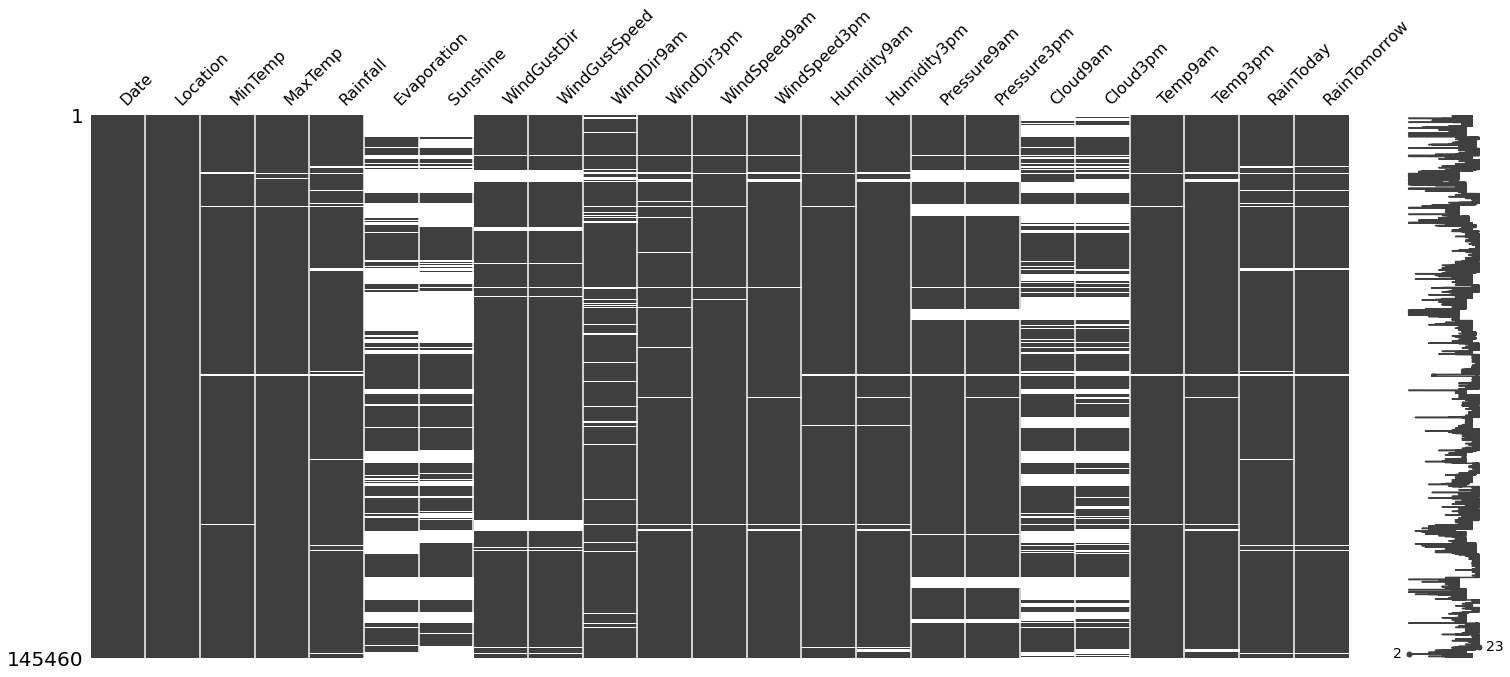

In [8]:
msn.matrix(df)

In [9]:
# so many null values :(

In [10]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [11]:
#we can see some of columns have null values over 15%. but i feel those columns sounds like important therefor i try to fill those null values insted of ignoring

In [12]:
numerical_features = [x for x in df.columns if df[x].dtypes !='O']

In [13]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
discreate_features = [x for x in numerical_features if len(df[x].unique())<12]

In [15]:
discreate_features # we sawit has null values and we have to use mode for fill those null values

['Cloud9am', 'Cloud3pm']

In [16]:
continouse_features = [x for x in numerical_features if x not in discreate_features]

In [17]:
continouse_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
categorical_features = [x for x in df.columns if x not in numerical_features]

In [19]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

### Handle missing values 

In [20]:
# handle outliers of featues which are has less null values by using mode or mean

In [21]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [22]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

In [23]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())

In [24]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [25]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])

In [26]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [27]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [28]:
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [29]:
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

In [30]:
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

In [31]:
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [32]:
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

In [33]:
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [34]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

In [35]:
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [36]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [37]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [38]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [39]:
# now we have four columns with a over 35% null values .. 
# i think to fill these null values by predcting from a model by using featuers which are affected to each individuls

In [40]:
# Evaporation,  this is a continouse feature.

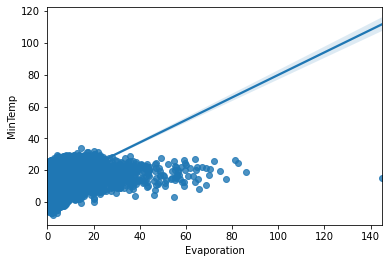

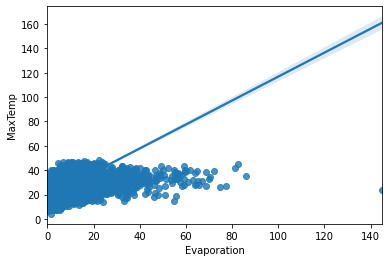

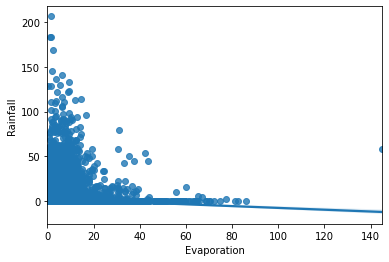

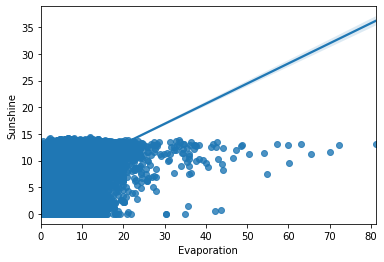

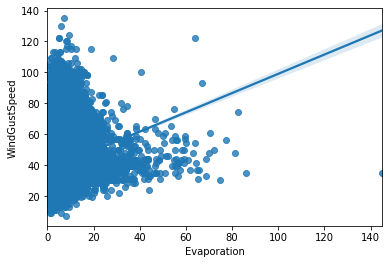

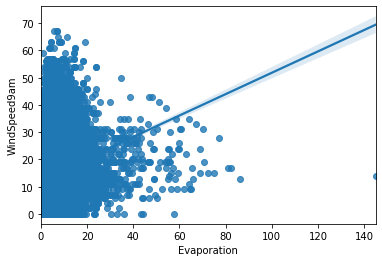

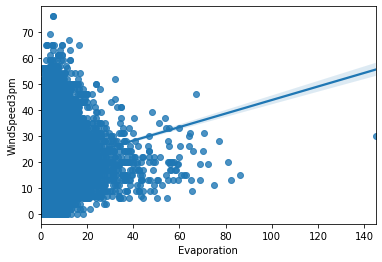

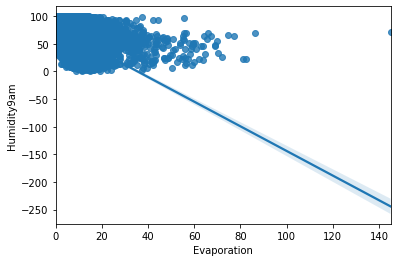

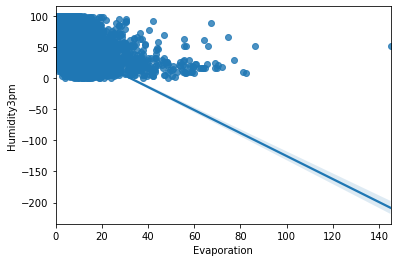

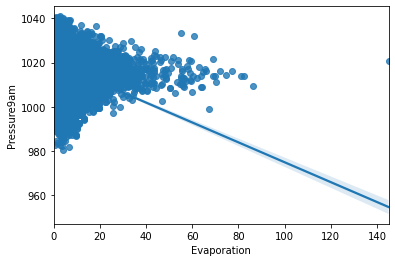

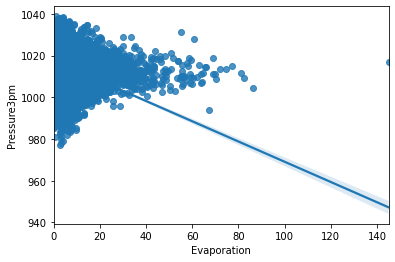

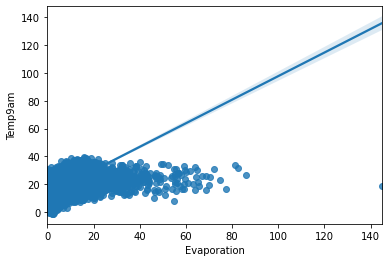

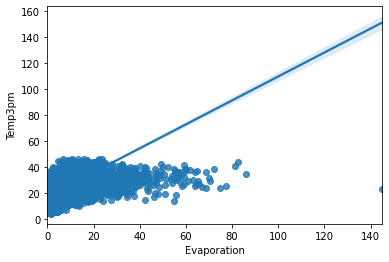

In [41]:
for i in continouse_features:
    if i == 'Evaporation':
        continue
    else:
        sns.regplot(data=df,x='Evaporation',y=i)
        plt.show()

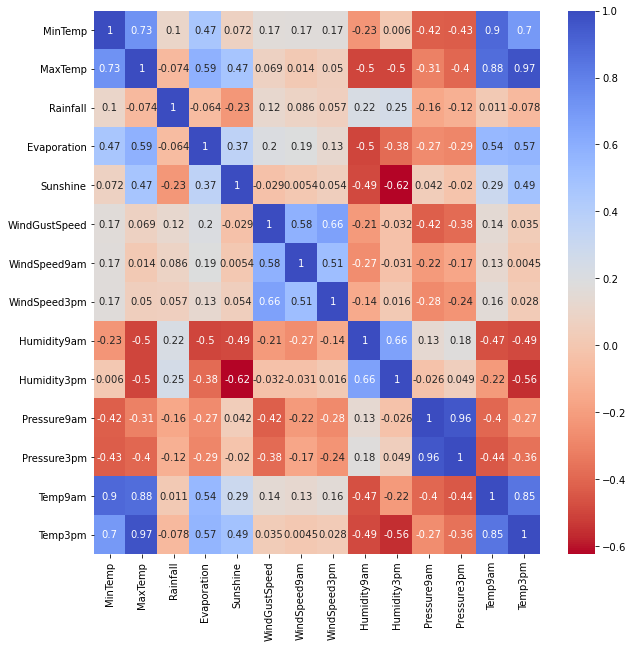

In [42]:
heat_Evaporation = df[continouse_features]
plt.figure(figsize=(10,10))
sns.heatmap(heat_Evaporation.corr(),annot=True,cmap='coolwarm_r')
plt.show()

In [43]:
# we can see MaxTemp, Temp9am, Temp3pm have healthy positive correlation with Evaporation 
# so i am gonna use above three features for predict the values of Evaporation 

In [44]:
from sklearn.linear_model import LinearRegression

data = df[['MaxTemp', 'Temp9am', 'Temp3pm','Evaporation']]

test_data = data[data["Evaporation"].isnull()]
data.dropna(inplace=True)

y_train = data["Evaporation"]
X_train = data.drop("Evaporation", axis=1)
X_test = test_data.drop("Evaporation", axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#y_pred is an arry it is coverted to  a data frame
y_df= pd.DataFrame(y_pred)

#make eaqul to the indexs in y_df from null value age indexes
y_df.index = df[df['Evaporation'].isnull()].index

#y_df[0] zero is column name
df.loc[df['Evaporation'].isnull(),'Evaporation'] = y_df[0]

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# Sunshine this also a continouse featue

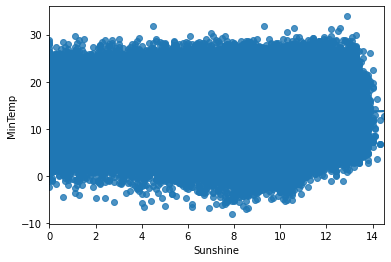

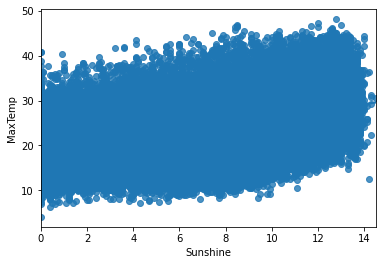

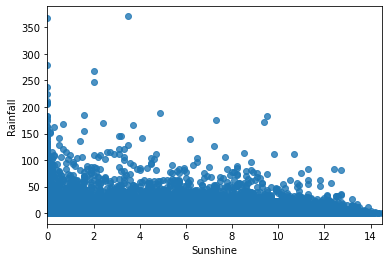

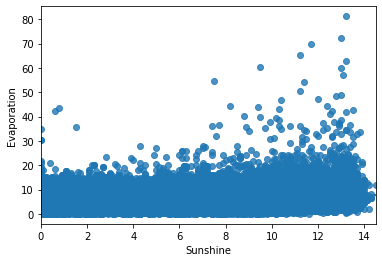

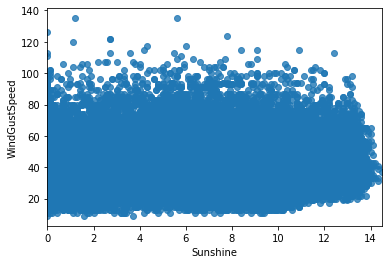

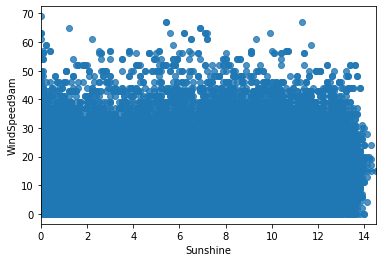

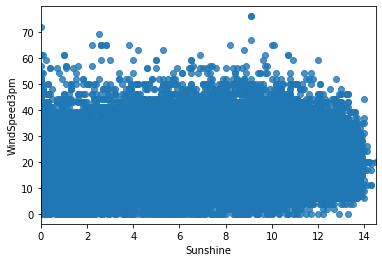

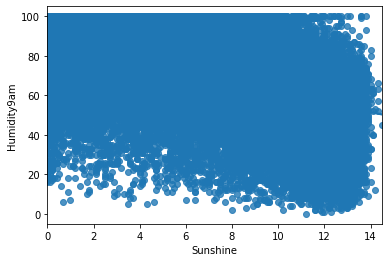

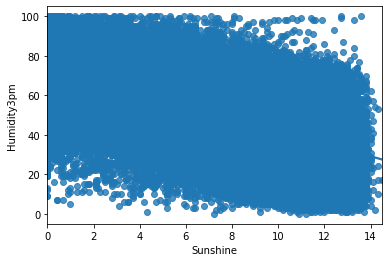

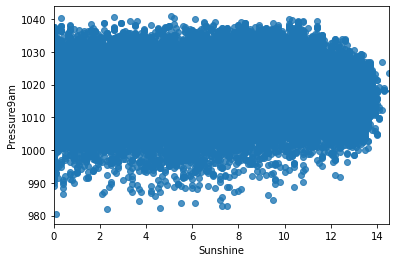

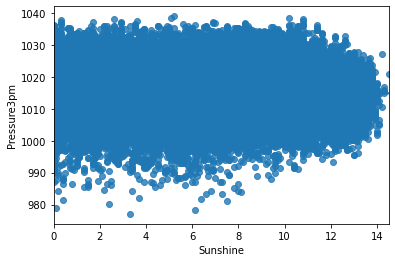

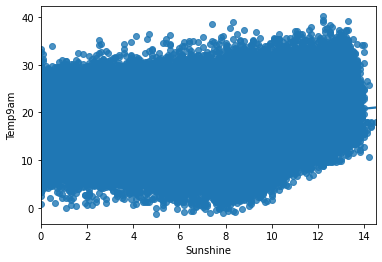

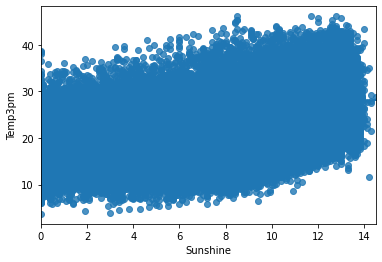

In [46]:
for i in continouse_features:
    if i == 'Sunshine':
        continue
    else:
        sns.regplot(data=df,x='Sunshine',y=i)
        plt.show()

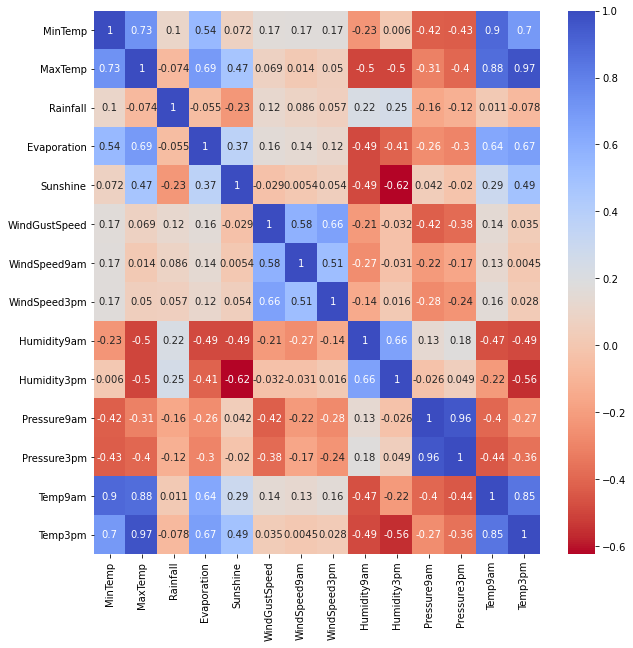

In [47]:
heat_Evaporation = df[continouse_features]
plt.figure(figsize=(10,10))
sns.heatmap(heat_Evaporation.corr(),annot=True,cmap='coolwarm_r')
plt.show()

In [48]:
# we can see MaxTemp, Evaporation, Temp3pm have healthy positive correlation with  Sunshine

In [49]:
from sklearn.linear_model import LinearRegression

data = df[['MaxTemp', 'Evaporation', 'Temp3pm','Sunshine']]

test_data = data[data["Sunshine"].isnull()]
data.dropna(inplace=True)

y_train = data["Sunshine"]
X_train = data.drop("Sunshine", axis=1)
X_test = test_data.drop("Sunshine", axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#y_pred is an arry it is coverted to  a data frame
y_df= pd.DataFrame(y_pred)

#make eaqul to the indexs in y_df from null value age indexes
y_df.index = df[df['Sunshine'].isnull()].index

#y_df[0] zero is column name
df.loc[df['Sunshine'].isnull(),'Sunshine'] = y_df[0]

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
# ['Cloud9am', 'Cloud3pm'] has over 40% null values and here we considsr these two features as dicreate ...
# i think just use random values for fill the null values.

In [51]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [52]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")

<AxesSubplot:>

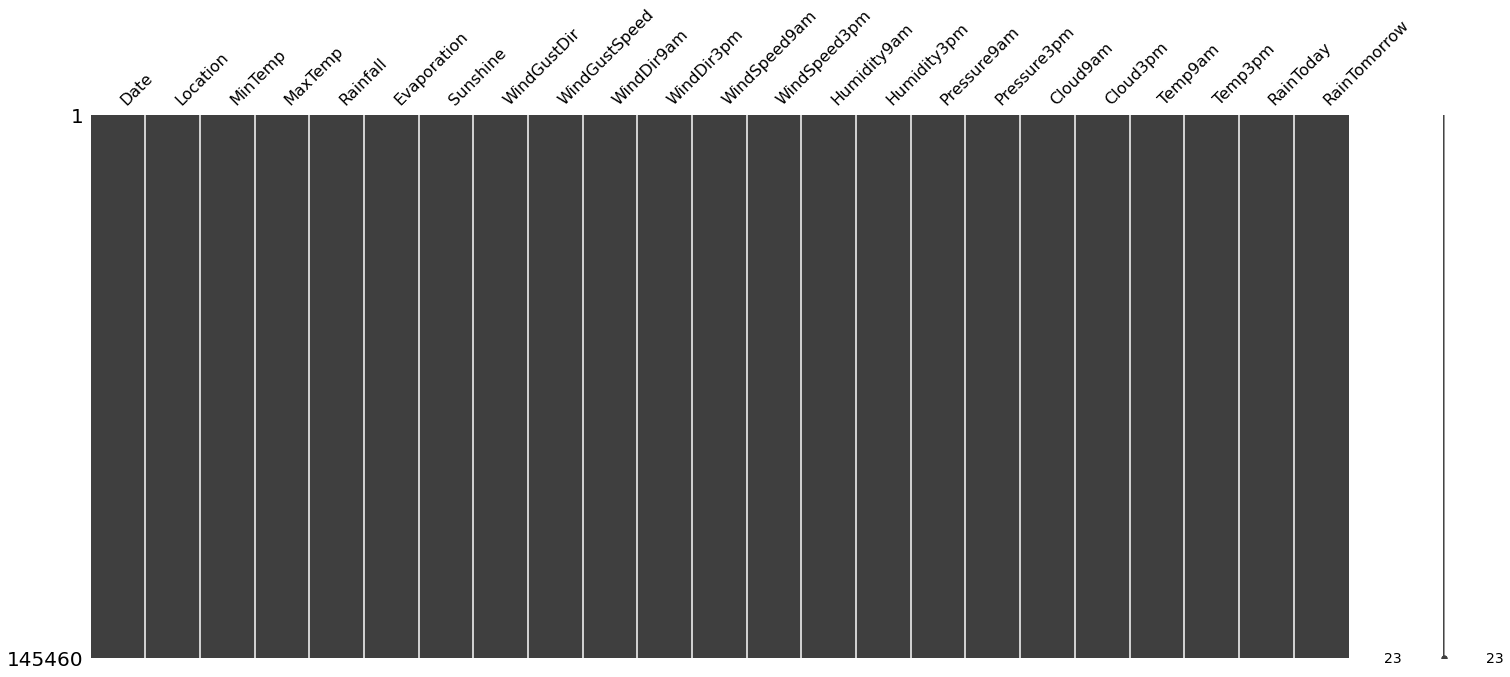

In [53]:
msn.matrix(df)

In [54]:
# we have manged all of the null values without removing

### Handle Outliers

In [55]:
# we can use boxplots for find outliers in continouse features

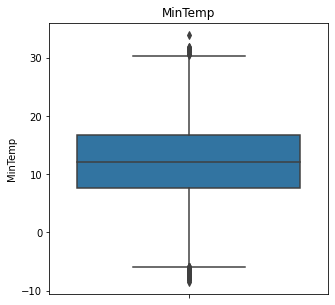

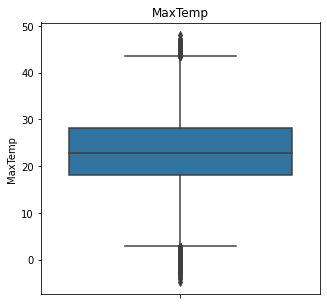

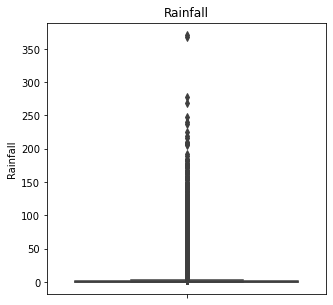

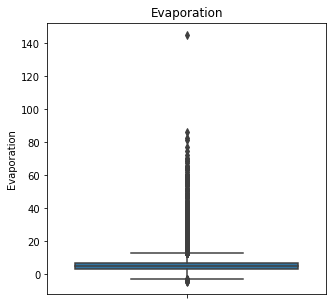

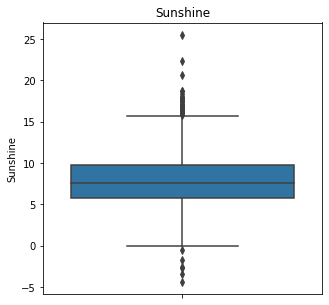

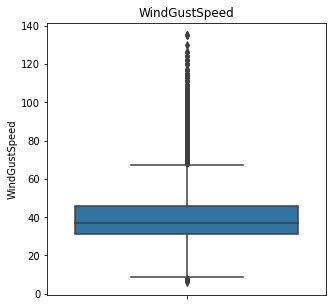

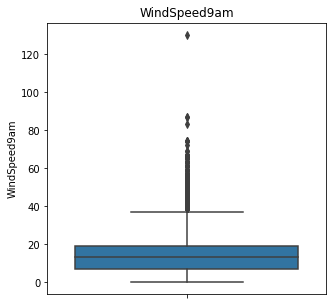

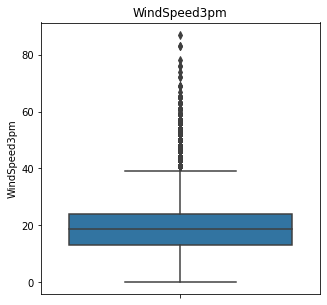

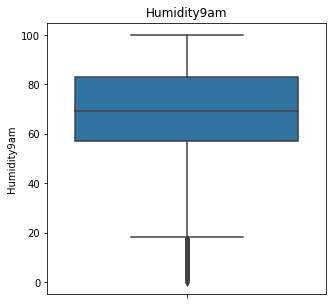

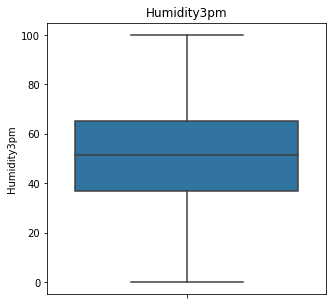

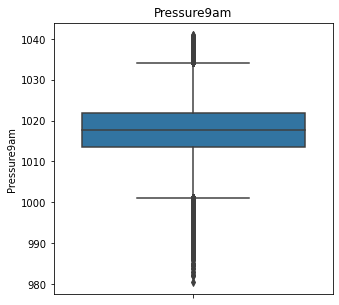

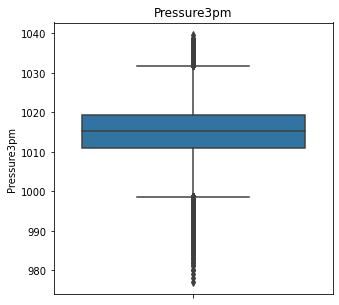

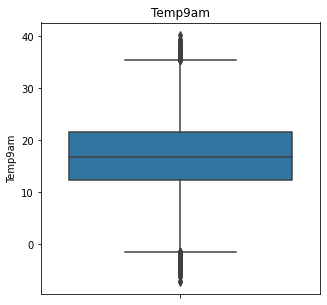

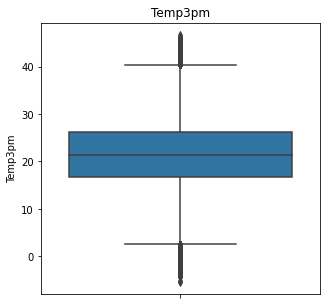

In [56]:
for feature in continouse_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, y=feature)
    plt.title(feature)
    plt.show()

In [57]:
# we can see every continouse featurs have ouliers in both upper bridge and lower bridge

In [58]:
# for MinTemp

In [59]:
df2 = df.copy()

<AxesSubplot:>

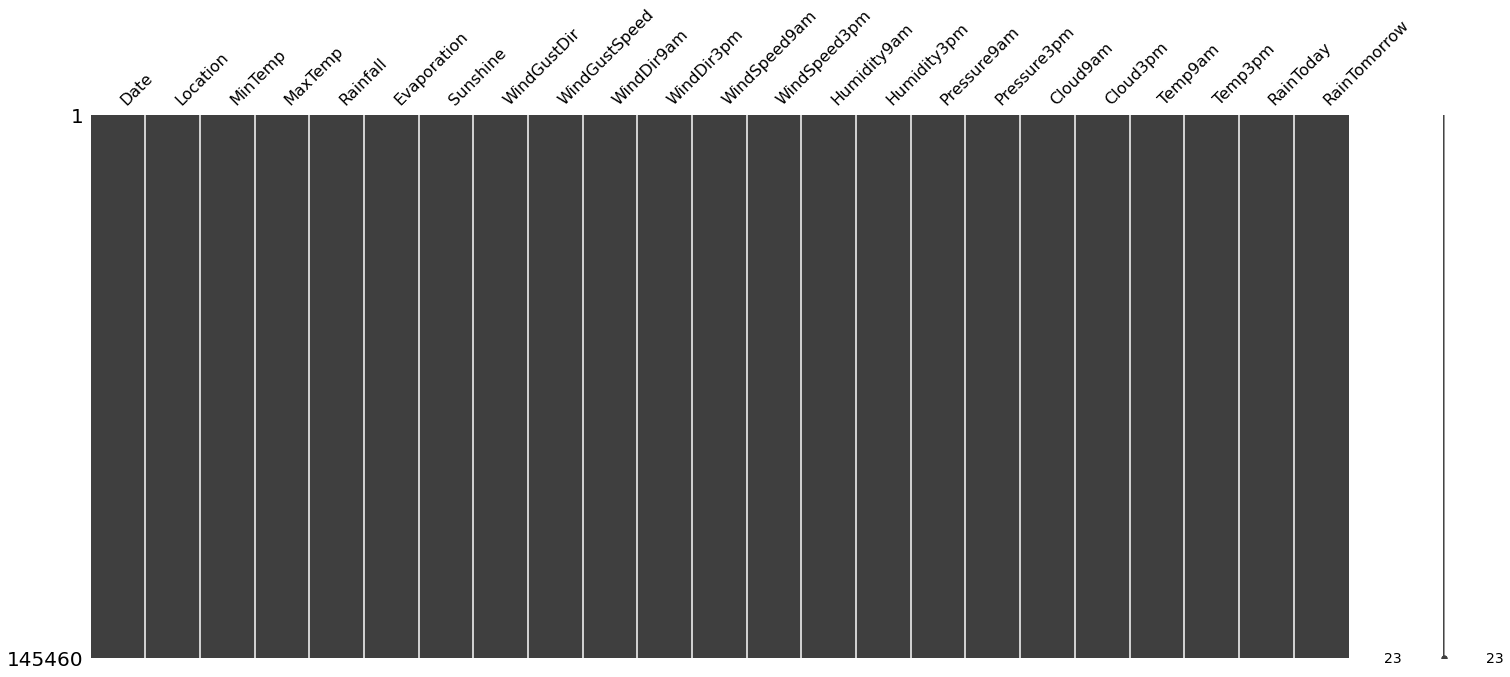

In [60]:
msn.matrix(df2)

In [61]:
IQR=df2.MinTemp.quantile(0.75)-df2.MinTemp.quantile(0.25)
lower_bridge=df2.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [62]:
df2.loc[df2['MinTemp']>=30.45,'MinTemp']=30.45
df2.loc[df2['MinTemp']<=-5.95,'MinTemp']=-5.95

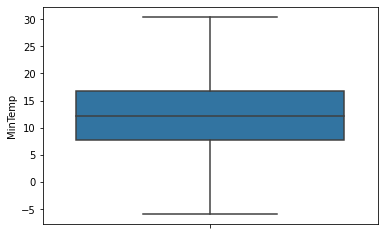

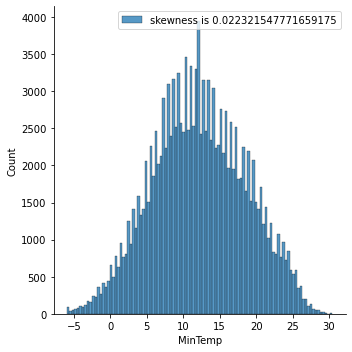

In [63]:
sns.boxplot(y=df2['MinTemp'])
plt.show()
sns.displot( data=df2['MinTemp'],label="skewness is {}".format(df2['MinTemp'].skew()))
plt.legend(loc='best')
plt.show()

In [64]:
# for MaxTemp

In [65]:
IQR=df2.MaxTemp.quantile(0.75)-df2.MaxTemp.quantile(0.25)
lower_bridge=df2.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [66]:
df2.loc[df2['MaxTemp']>=43.5,'MaxTemp']=43.5
df2.loc[df2['MaxTemp']<=2.7,'MaxTemp']=2.7

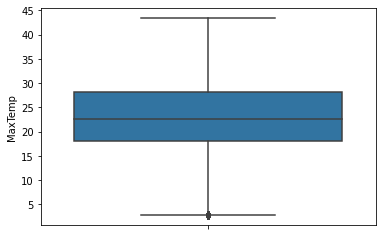

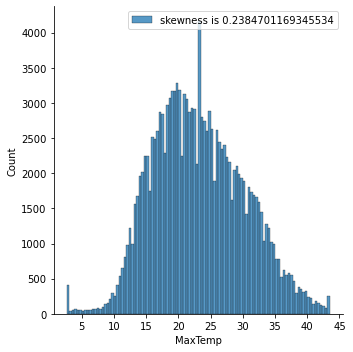

In [67]:
sns.boxplot(y=df2['MaxTemp'])
plt.show()
sns.displot( data=df2['MaxTemp'],label="skewness is {}".format(df2['MaxTemp'].skew()))
plt.legend(loc='best')
plt.show()

In [68]:
#for Rainfall

In [69]:
IQR=df2.Rainfall.quantile(0.75)-df2.Rainfall.quantile(0.25)
lower_bridge=df2.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.5 2.5


In [70]:
df2.loc[df2['Rainfall']<=-1.5,'Rainfall']=-1.5
df2.loc[df2['Rainfall']>=2.5,'Rainfall']=2.5

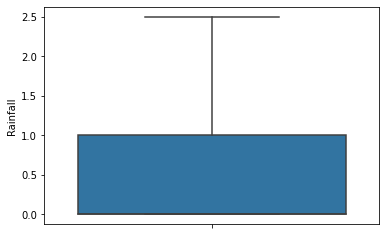

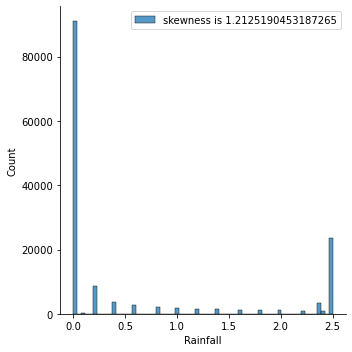

In [71]:
sns.boxplot(y=df2['Rainfall'])
plt.show()
sns.displot( data=df2['Rainfall'],label="skewness is {}".format(df2['Rainfall'].skew()))
plt.legend(loc='best')
plt.show()

In [72]:
# for Evaporation

In [73]:
IQR=df2.Evaporation.quantile(0.75)-df2.Evaporation.quantile(0.25)
lower_bridge=df2.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.1096509973085884 12.980878191766426


In [74]:
df2.loc[df['Evaporation']>=12.98,'Evaporation']=12.98
df2.loc[df['Evaporation']<=-3.109,'Evaporation']=-3.109

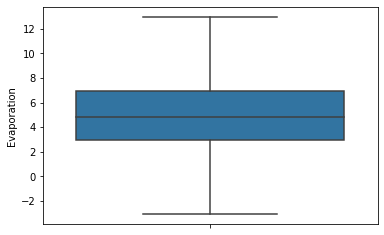

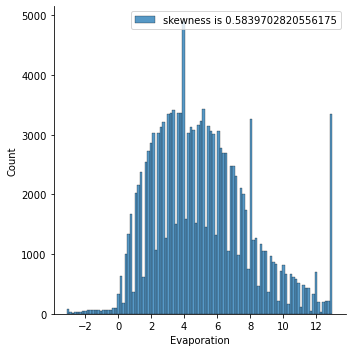

In [75]:
sns.boxplot(y=df2['Evaporation'])
plt.show()
sns.displot( data=df2['Evaporation'],label="skewness is {}".format(df2['Evaporation'].skew()))
plt.legend(loc='best')
plt.show()

In [76]:
# for WindGustSpeed

In [77]:
IQR=df2.WindGustSpeed.quantile(0.75)-df2.WindGustSpeed.quantile(0.25)
lower_bridge=df2.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [78]:
df2.loc[df2['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df2.loc[df2['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

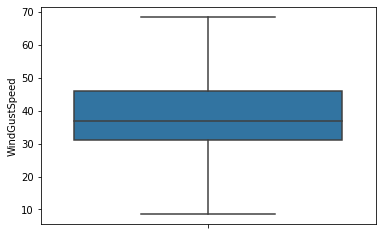

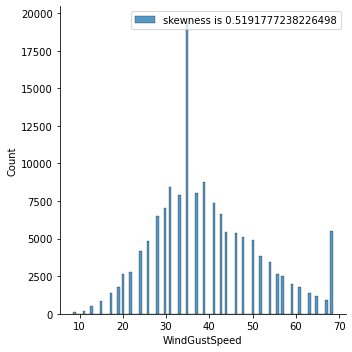

In [79]:
sns.boxplot(y=df2['WindGustSpeed'])
plt.show()
sns.displot( data=df2['WindGustSpeed'],label="skewness is {}".format(df2['WindGustSpeed'].skew()))
plt.legend(loc='best')
plt.show()

In [80]:
# for WindSpeed9am

In [81]:
IQR=df2.WindSpeed9am.quantile(0.75)-df2.WindSpeed9am.quantile(0.25)
lower_bridge=df2.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [82]:
df2.loc[df2['WindSpeed9am']>=37,'WindSpeed9am']=37
df2.loc[df2['WindSpeed9am']<=-11,'WindSpeed9am']=-11

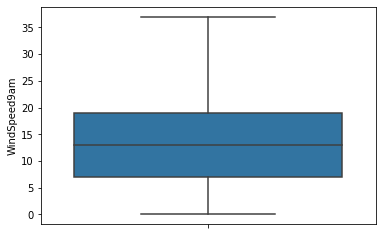

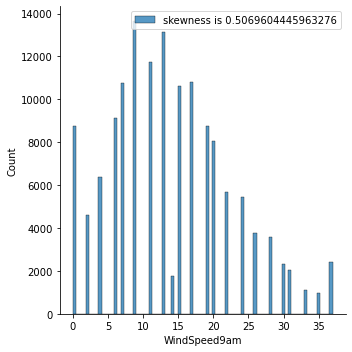

In [83]:
sns.boxplot(y=df2['WindSpeed9am'])
plt.show()
sns.displot( data=df2['WindSpeed9am'],label="skewness is {}".format(df2['WindSpeed9am'].skew()))
plt.legend(loc='best')
plt.show()

In [84]:
#for WindSpeed3pm

In [85]:
IQR=df2.WindSpeed3pm.quantile(0.75)-df2.WindSpeed3pm.quantile(0.25)
lower_bridge=df2.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [86]:
df2.loc[df2['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df2.loc[df2['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

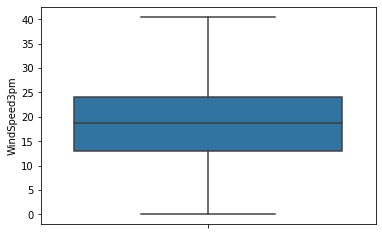

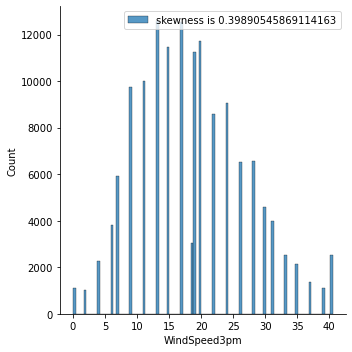

In [87]:
sns.boxplot(y=df2['WindSpeed3pm'])
plt.show()
sns.displot( data=df2['WindSpeed3pm'],label="skewness is {}".format(df2['WindSpeed3pm'].skew()))
plt.legend(loc='best')
plt.show()

In [88]:
#for Humidity9am

In [89]:
IQR=df2.Humidity9am.quantile(0.75)-df2.Humidity9am.quantile(0.25)
lower_bridge=df2.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [90]:
df2.loc[df2['Humidity9am']>=122,'Humidity9am']=122
df2.loc[df2['Humidity9am']<=18,'Humidity9am']=18

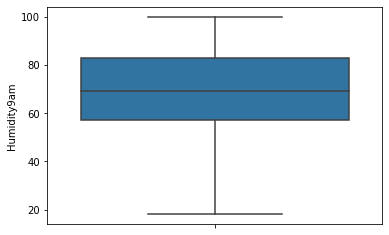

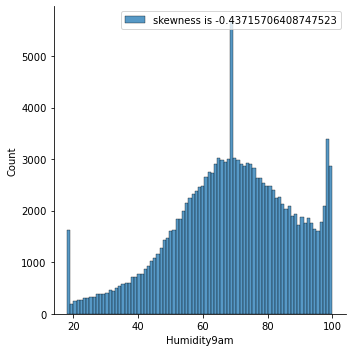

In [91]:
sns.boxplot(y=df2['Humidity9am'])
plt.show()
sns.displot( data=df2['Humidity9am'],label="skewness is {}".format(df2['Humidity9am'].skew()))
plt.legend(loc='best')
plt.show()

In [92]:
# for Pressure9am

In [93]:
IQR=df2.Pressure9am.quantile(0.75)-df2.Pressure9am.quantile(0.25)
lower_bridge=df2.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [94]:
df2.loc[df2['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df2.loc[df2['Pressure9am']<=1001.05,'Pressure9am']=1001.05

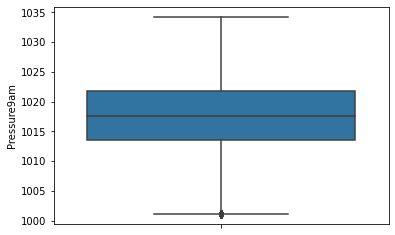

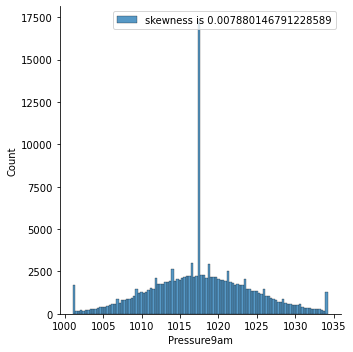

In [95]:
sns.boxplot(y=df2['Pressure9am'])
plt.show()
sns.displot( data=df2['Pressure9am'],label="skewness is {}".format(df2['Pressure9am'].skew()))
plt.legend(loc='best')
plt.show()

In [96]:
#for Pressure3pm

In [97]:
IQR=df2.Pressure3pm.quantile(0.75)-df2.Pressure3pm.quantile(0.25)
lower_bridge=df2.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [98]:
df2.loc[df2['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df2.loc[df2['Pressure3pm']<=998.65,'Pressure3pm']=998.65

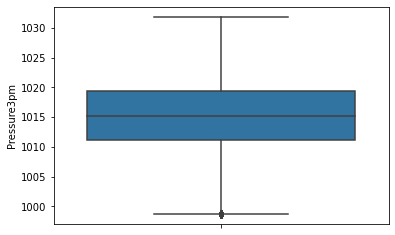

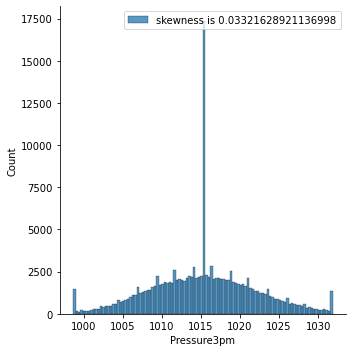

In [99]:
sns.boxplot(y=df2['Pressure3pm'])
plt.show()
sns.displot( data=df2['Pressure3pm'],label="skewness is {}".format(df2['Pressure3pm'].skew()))
plt.legend(loc='best')
plt.show()

In [100]:
#for Temp9am

In [101]:
IQR=df2.Temp9am.quantile(0.75)-df2.Temp9am.quantile(0.25)
lower_bridge=df2.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [102]:
df2.loc[df2['Temp9am']>=35.3,'Temp9am']=35.3
df2.loc[df2['Temp9am']<=-1.49,'Temp9am']=-1.49

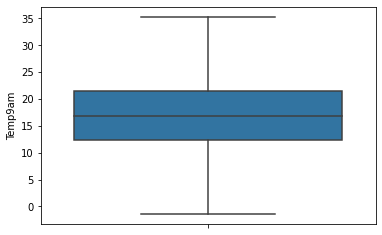

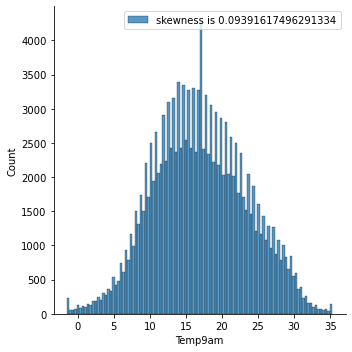

In [103]:
sns.boxplot(y=df2['Temp9am'])
plt.show()
sns.displot( data=df2['Temp9am'],label="skewness is {}".format(df2['Temp9am'].skew()))
plt.legend(loc='best')
plt.show()

In [104]:
# for Temp3pm

In [105]:
IQR=df2.Temp3pm.quantile(0.75)-df2.Temp3pm.quantile(0.25)
lower_bridge=df2.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df2.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [106]:
df2.loc[df2['Temp3pm']>=40.45,'Temp3pm']=40.45
df2.loc[df2['Temp3pm']<=2.45,'Temp3pm']=2.4499

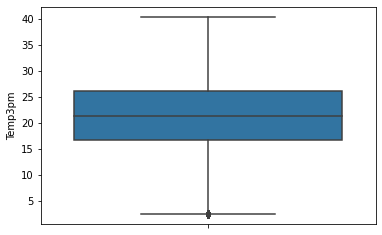

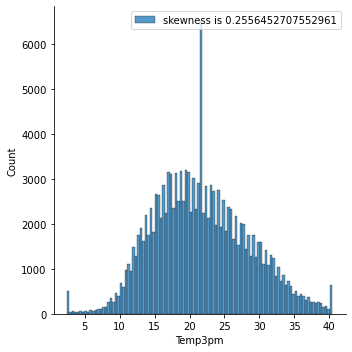

In [107]:
sns.boxplot(y=df2['Temp3pm'])
plt.show()
sns.displot( data=df2['Temp3pm'],label="skewness is {}".format(df2['Temp3pm'].skew()))
plt.legend(loc='best')
plt.show()

<AxesSubplot:>

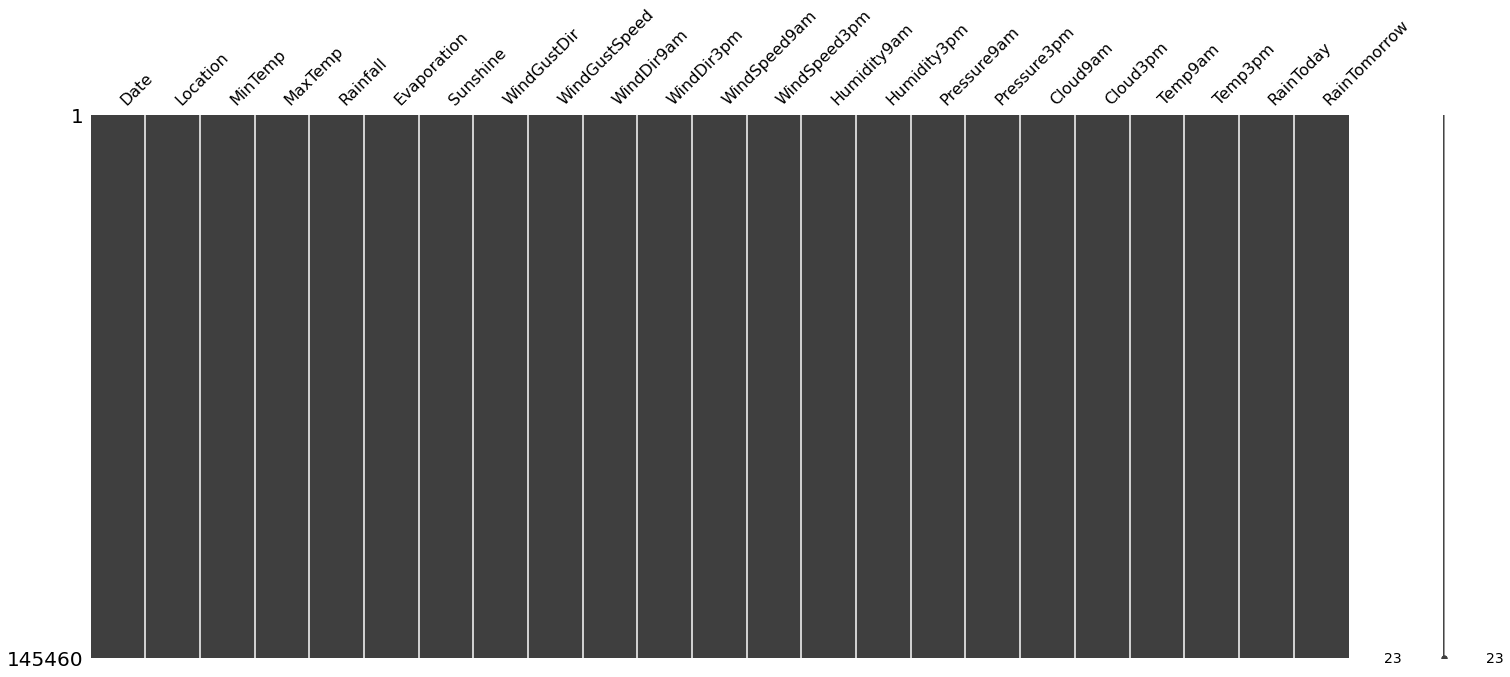

In [108]:
msn.matrix(df2)

### Data Transformtion

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


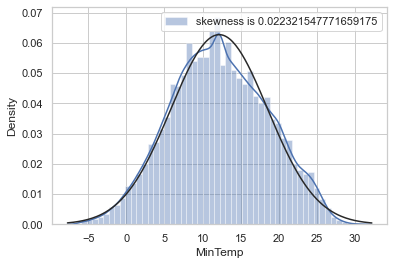

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


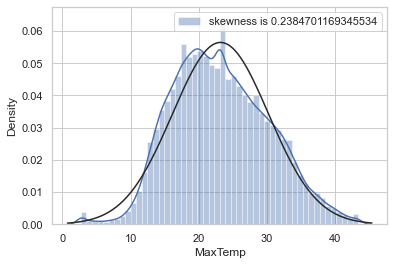

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


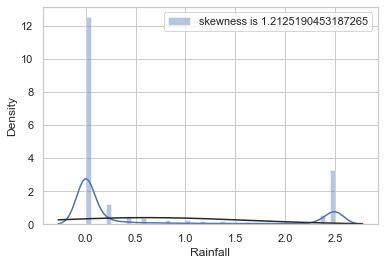

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


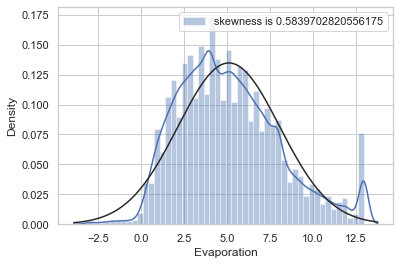

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


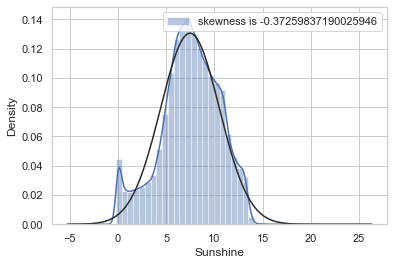

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


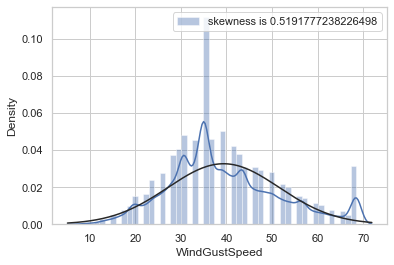

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


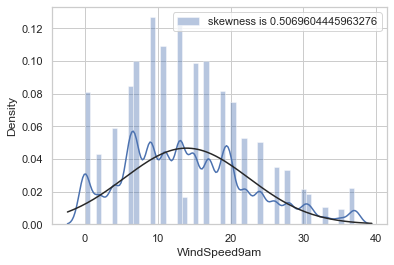

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


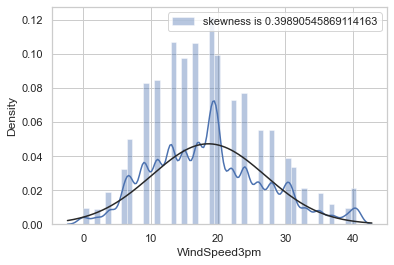

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


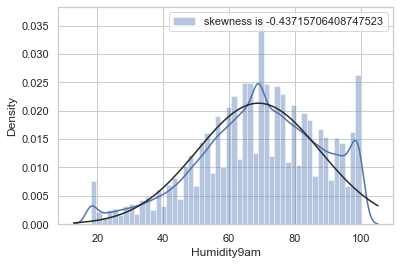

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


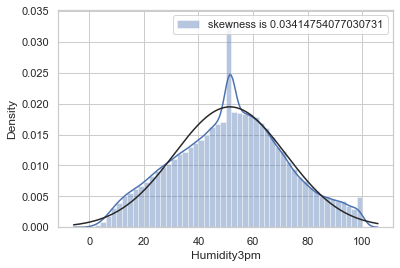

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


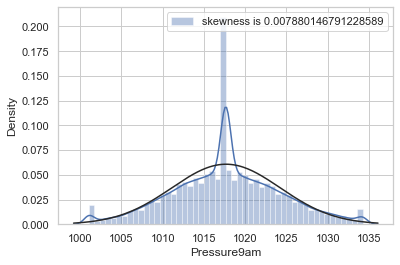

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


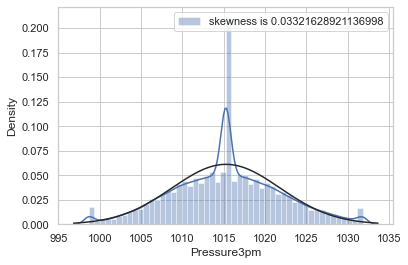

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


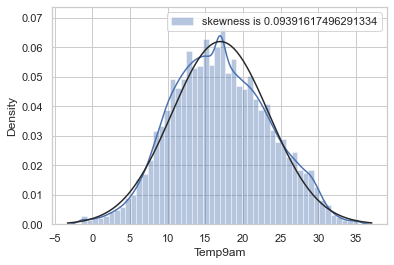

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


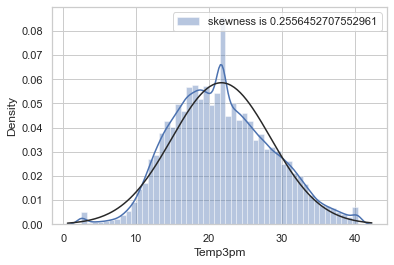

In [109]:
from scipy.stats import norm
for x in continouse_features:
    sns.set_theme(style='whitegrid')
    sns.distplot(df2[x],label="skewness is {}".format(df2[x].skew()),fit=norm)
    plt.legend(loc='upper right')
    plt.show()

In [110]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    print("skewness is {}".format(df[feature].skew()))
    sns.distplot(df[feature],label="skewness is {}".format(df[feature].skew()),fit=norm)
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [111]:
df3 = df2.copy()

skewness is -0.533203511623353


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


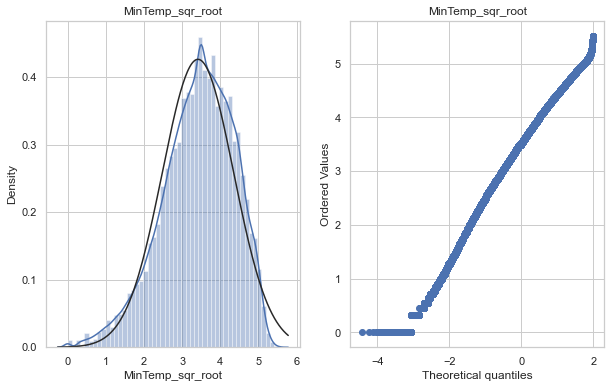

skewness is 1.068204814821798


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


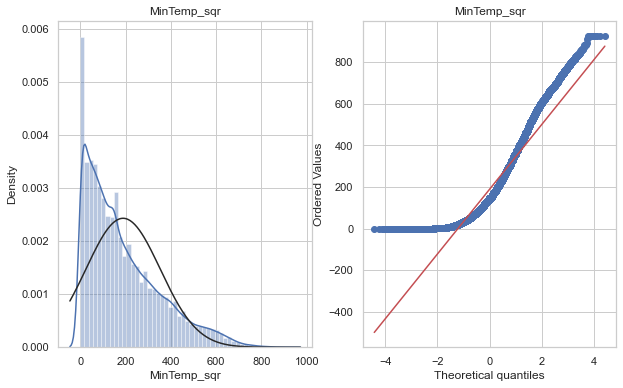

skewness is -0.019946084483507796


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


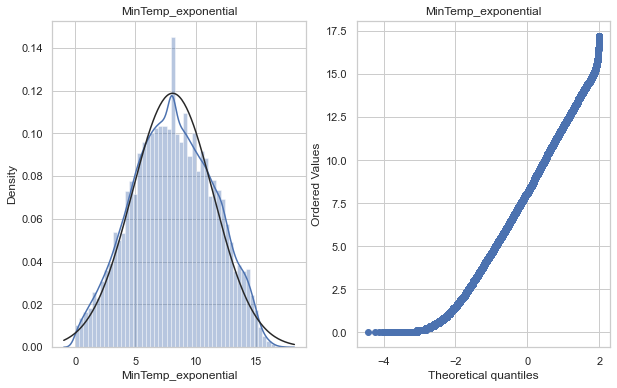

skewness is -1.2702015553819344


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


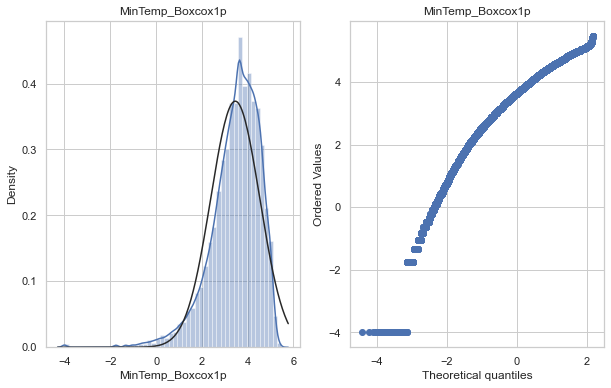

In [112]:
for i in ['MinTemp']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=np.square(df3[i])
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')
    
    
    

In [113]:
df3.isnull().sum()

Date                      0
Location                  0
MinTemp                   0
MaxTemp                   0
Rainfall                  0
Evaporation               0
Sunshine                  0
WindGustDir               0
WindGustSpeed             0
WindDir9am                0
WindDir3pm                0
WindSpeed9am              0
WindSpeed3pm              0
Humidity9am               0
Humidity3pm               0
Pressure9am               0
Pressure3pm               0
Cloud9am                  0
Cloud3pm                  0
Temp9am                   0
Temp3pm                   0
RainToday                 0
RainTomorrow              0
MinTemp_sqr_root       3464
MinTemp_sqr               0
MinTemp_exponential    3464
MinTemp_Boxcox1p       2173
dtype: int64

In [114]:
df3[df3['MinTemp_sqr_root'].isnull()].index

Int64Index([   192,    193,    218,    219,    220,    227,    228,    229,
               235,    236,
            ...
            144375, 144378, 144379, 144384, 144392, 144393, 144413, 144414,
            145114, 145116],
           dtype='int64', length=3464)

In [115]:
df.iloc[193]

Date             2009-06-12
Location             Albury
MinTemp                -1.3
MaxTemp                 8.2
Rainfall                0.0
Evaporation       -0.209443
Sunshine           3.893542
WindGustDir             ESE
WindGustSpeed          15.0
WindDir9am                E
WindDir3pm              SSE
WindSpeed9am            6.0
WindSpeed3pm            6.0
Humidity9am            99.0
Humidity3pm            72.0
Pressure9am          1025.7
Pressure3pm          1022.2
Cloud9am                8.0
Cloud3pm                7.0
Temp9am                 1.9
Temp3pm                 7.9
RainToday                No
RainTomorrow             No
Name: 193, dtype: object

In [116]:
# Exponential tranformation is better for MinTemp

skewness is -0.019946084483507796


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


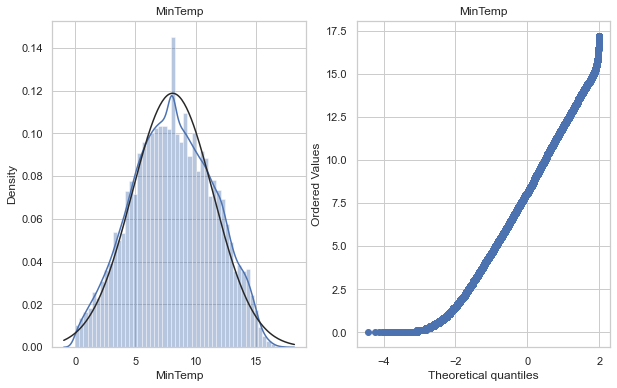

In [117]:
df2['MinTemp']=df2['MinTemp']**(1/1.2)
plot_data(df2,'MinTemp')

<AxesSubplot:>

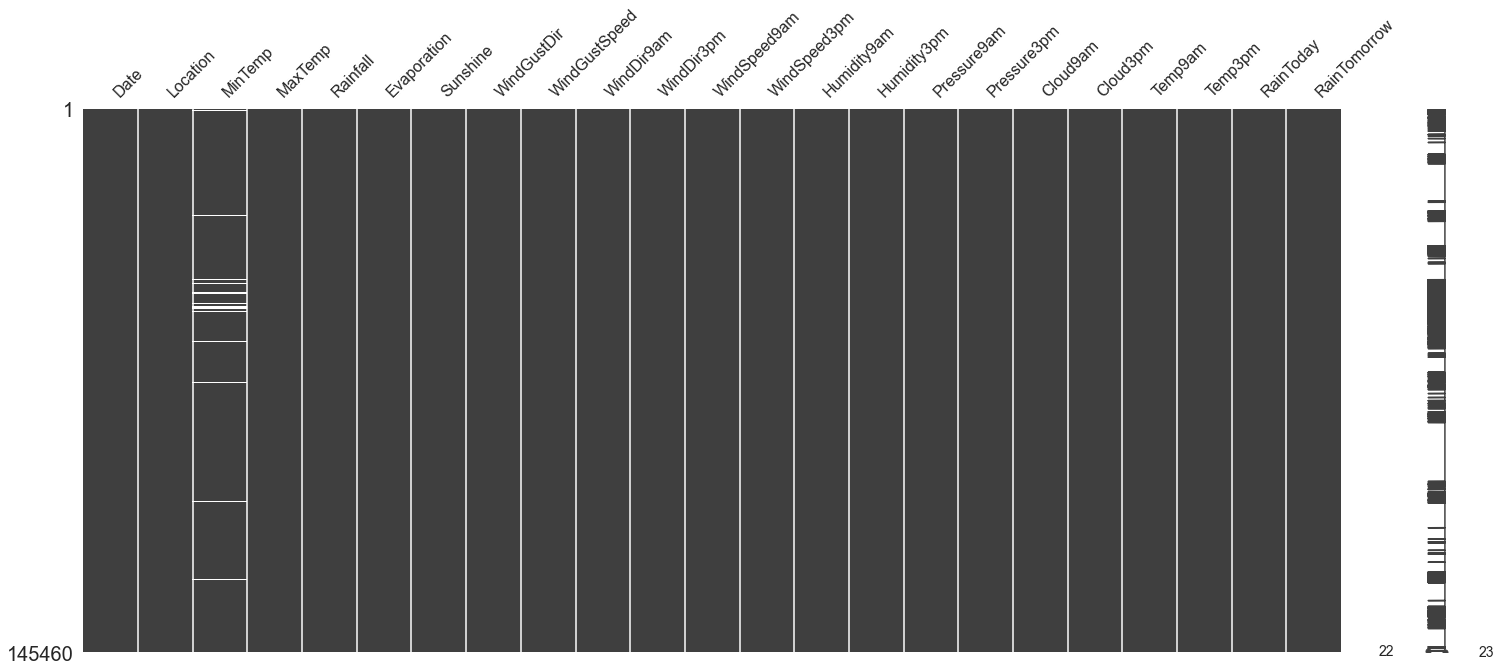

In [118]:
msn.matrix(df2)

In [119]:
#for MaxTemp

skewness is -0.25988874031841575


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


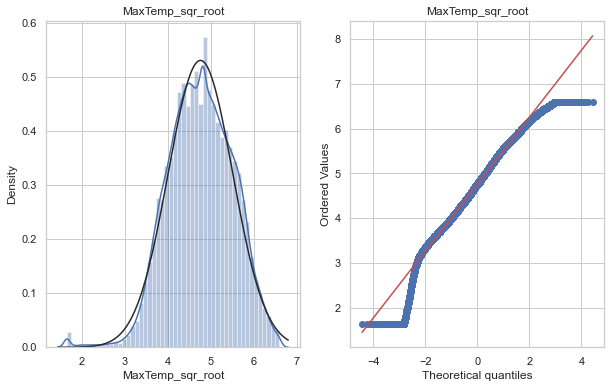

skewness is 0.9360281243552212


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


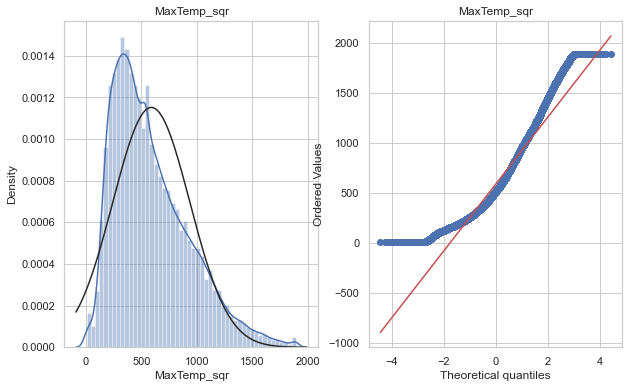

skewness is 0.0941290991665795


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


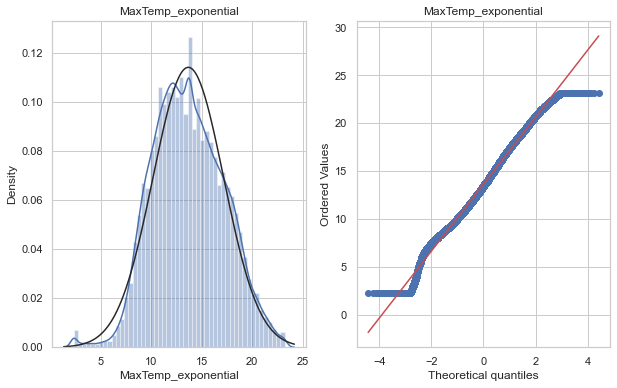

skewness is -0.539930878300529


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


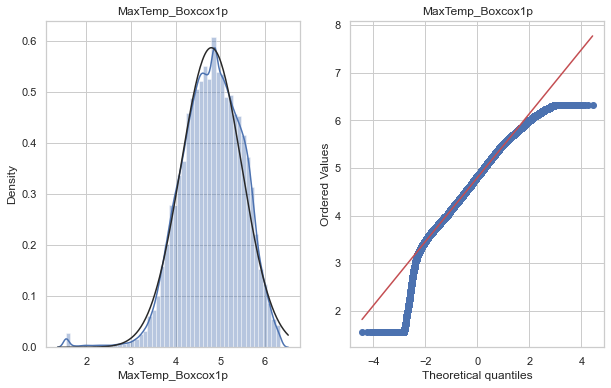

In [120]:
for i in ['MaxTemp']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [121]:
# Exponential tranformation is better for MaxTemp

skewness is 0.0941290991665795


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


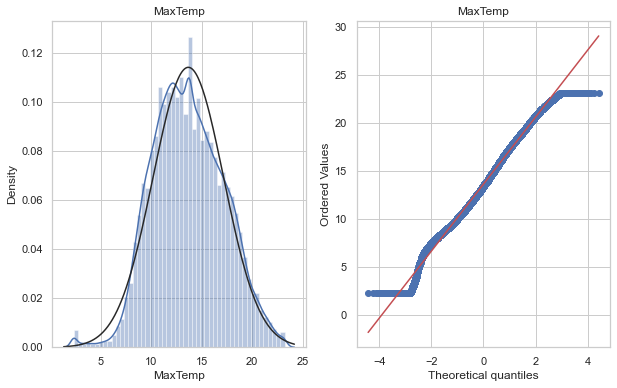

In [122]:
df2['MaxTemp']=df2[i]**(1/1.2)
plot_data(df2,'MaxTemp')

skewness is 0.9484774347626701


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


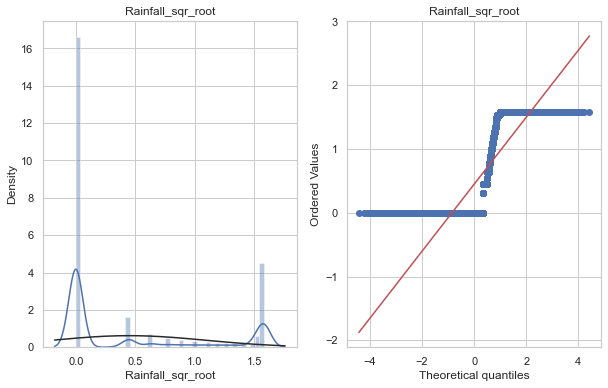

skewness is 1.3926517314076599


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


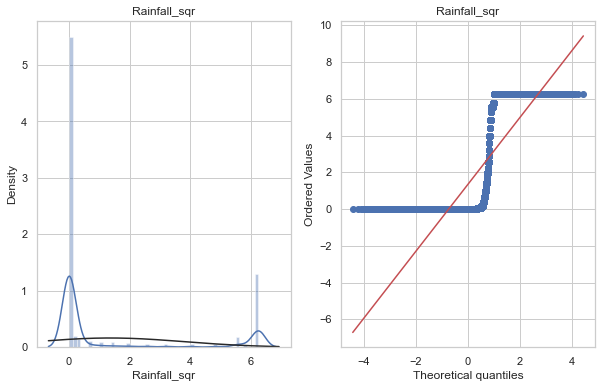

skewness is 1.1502761234908507


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


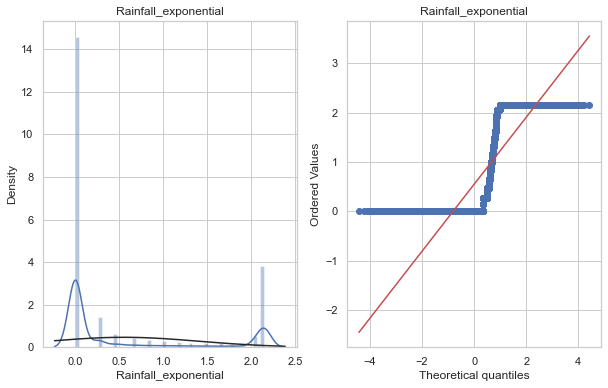

skewness is 1.113730749983077


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


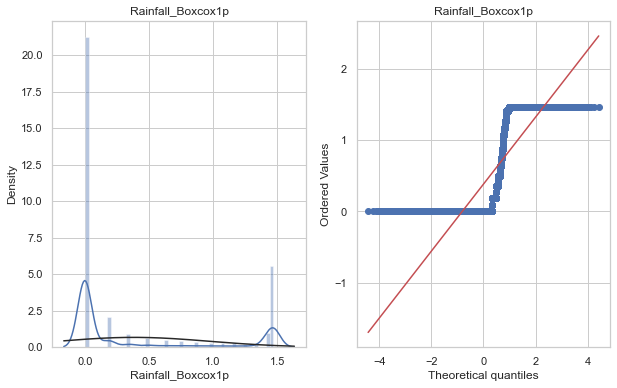

In [123]:
for i in ['Rainfall']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [124]:
# i prefer to stay unchanged about rainfall

In [125]:
# for Evaporation

In [126]:
df3 = df2.copy()

skewness is -0.10838580799637085


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


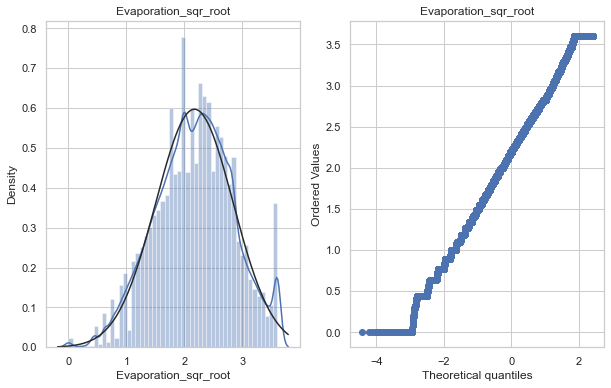

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness is 1.799918912449258


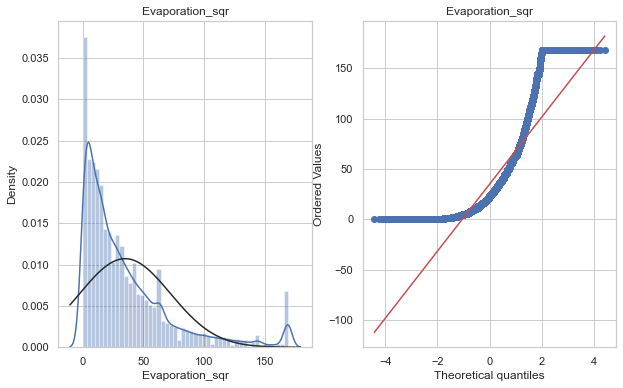

skewness is 0.4288581356911854


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


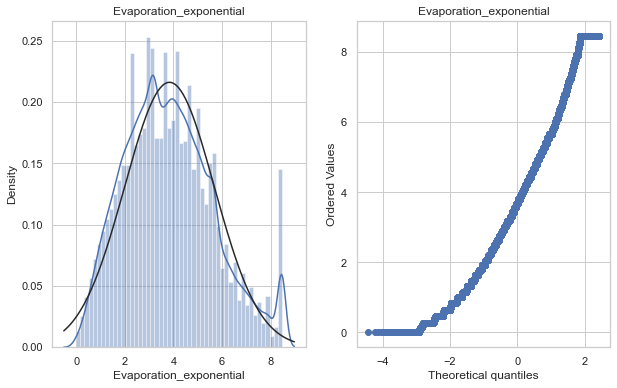

skewness is -0.3468229103024957


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


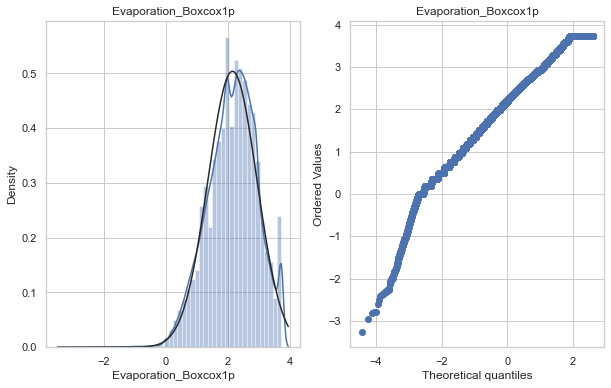

In [127]:
for i in ['Evaporation']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [128]:
# sqare root transformation is better for Evaporation

skewness is -0.10838580799637085


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


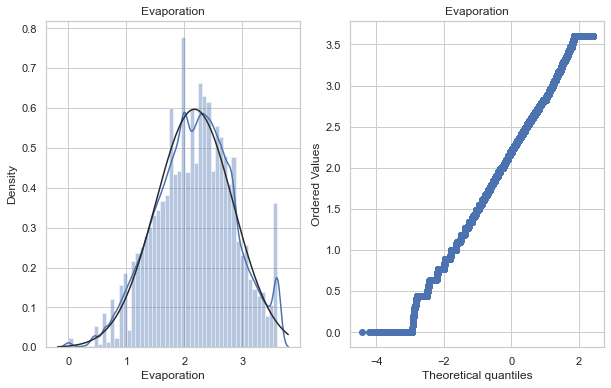

In [129]:
df2['Evaporation']=df2['Evaporation']**(1/2)
plot_data(df2,'Evaporation')

<AxesSubplot:>

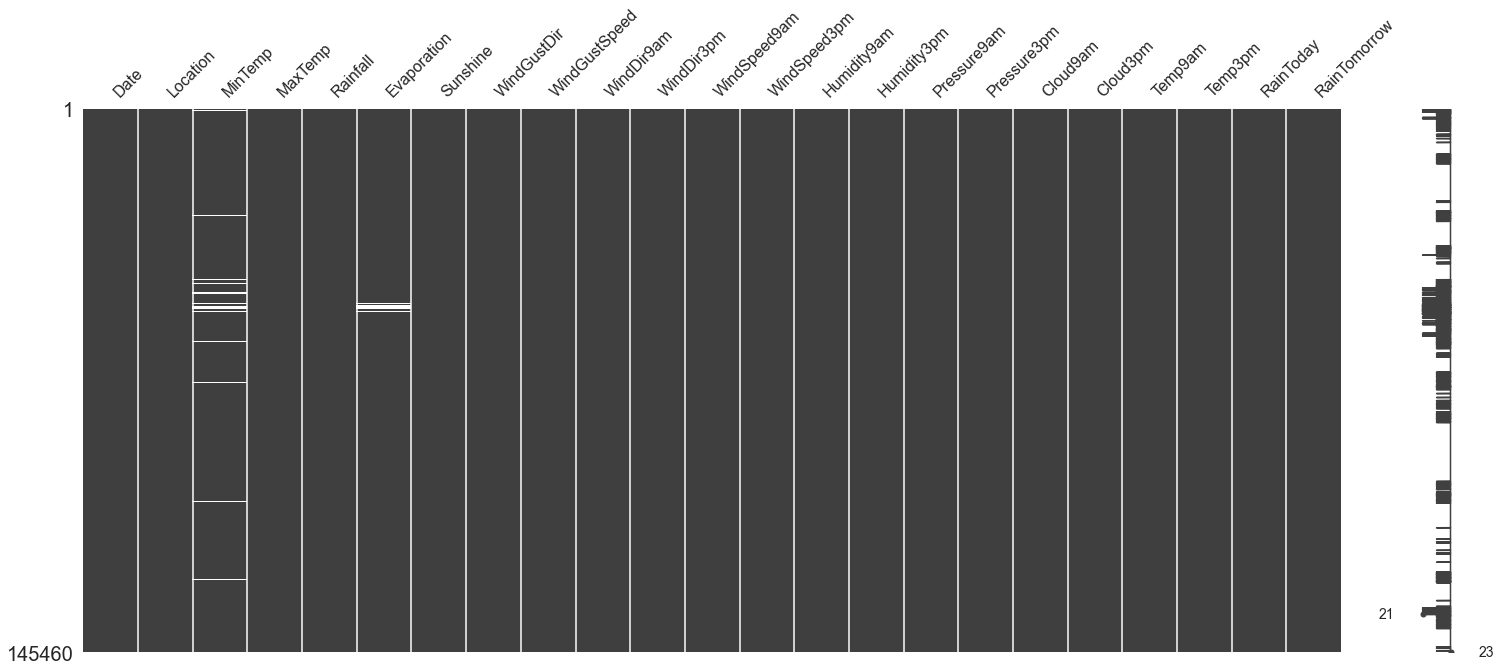

In [130]:
msn.matrix(df2)

In [131]:
#for Sunshine

skewness is -1.5241622602808154


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


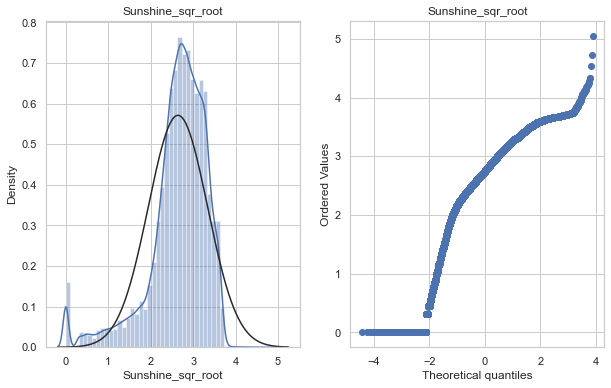

skewness is 0.6666805810347818


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


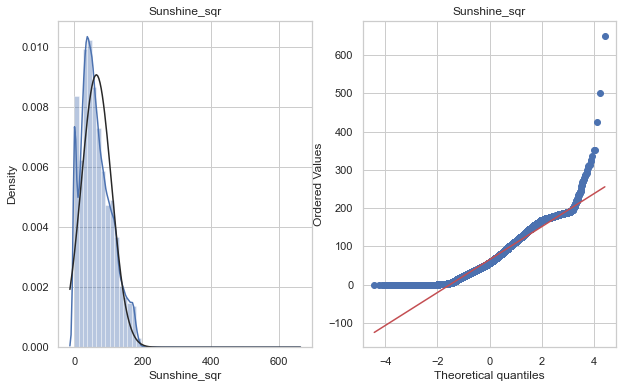

skewness is -0.6530101782686357


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


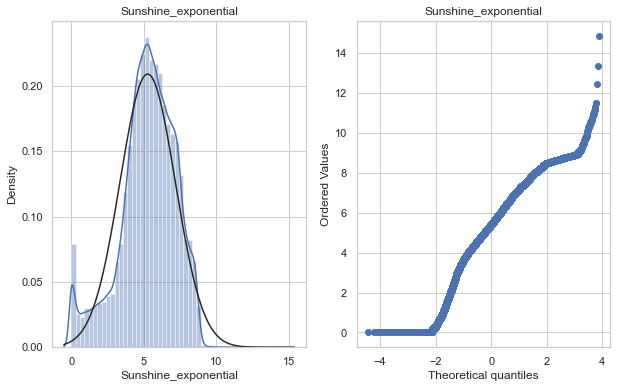

skewness is -1.50575231047772


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


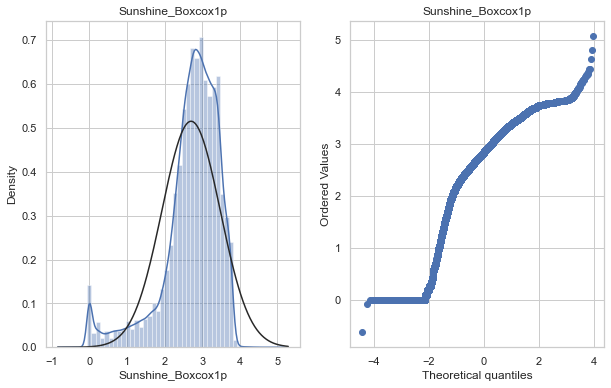

In [132]:
for i in ['Sunshine']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [133]:
# square transformation is better for Sunshine

skewness is 0.6666805810347818


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


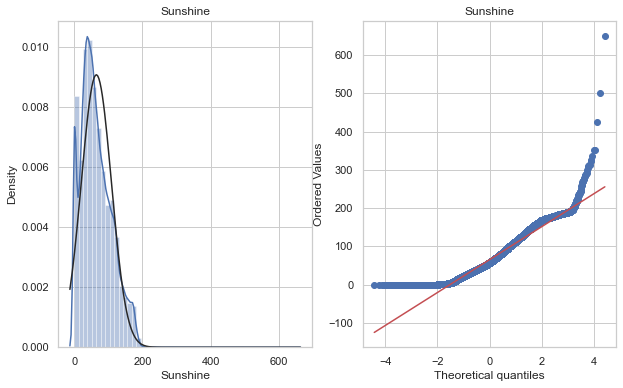

In [134]:
df2['Sunshine']=df2['Sunshine']**2
plot_data(df2,'Sunshine')

In [135]:
df3 = df2.copy()

In [136]:
# for WindGustSpeed

In [137]:
df3 = df2.copy()

skewness is 0.09472495480269279


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


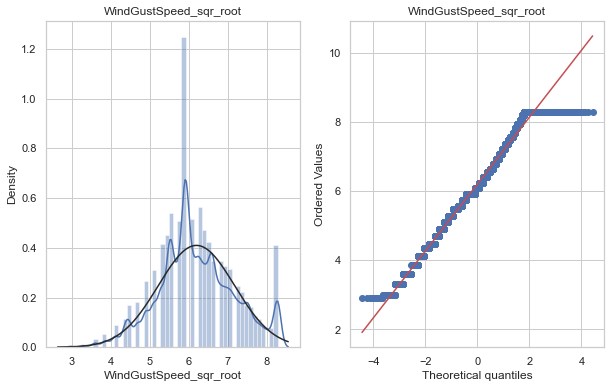

skewness is 1.2029069337113931


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


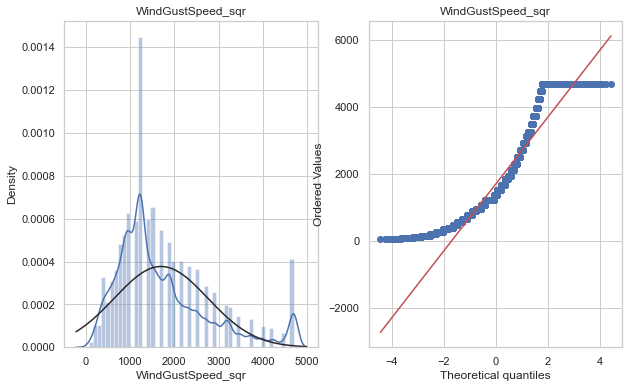

skewness is 0.38557670805608796


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


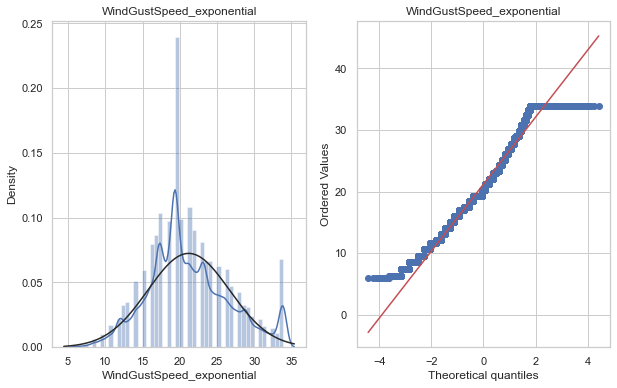

skewness is -0.12547694732488765


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


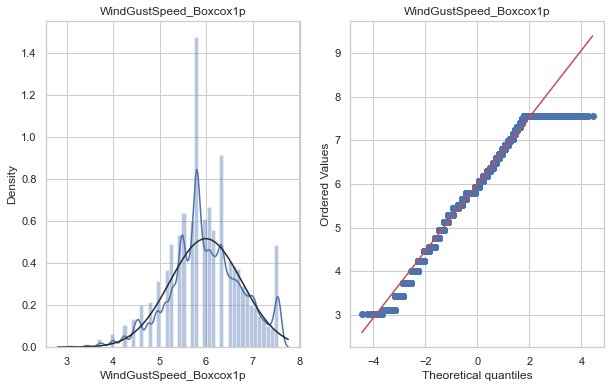

skewness is 0.00080108527174916


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


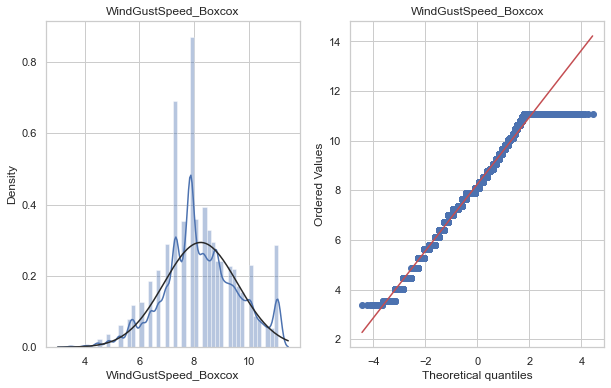

In [138]:
for i in ['WindGustSpeed']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    plot_data(df3,i+'_Boxcox')

In [139]:
# boxcox is better for WingGustSpeed

skewness is 0.00080108527174916


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


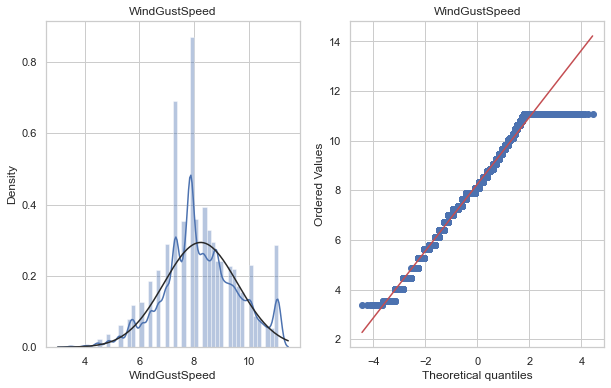

In [140]:
df2['WindGustSpeed'],_=stat.boxcox(df2['WindGustSpeed'])
plot_data(df2,'WindGustSpeed')

In [141]:
#for WindSpeed9am

In [142]:
df3 = df2.copy()

skewness is -1.4781622954337263


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


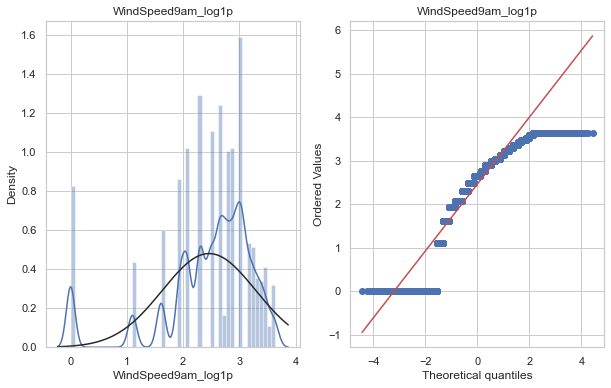

skewness is -0.7152671432776199


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


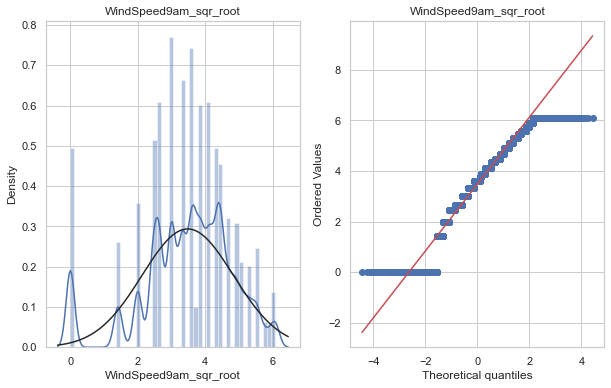

skewness is 1.7393918905979917


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


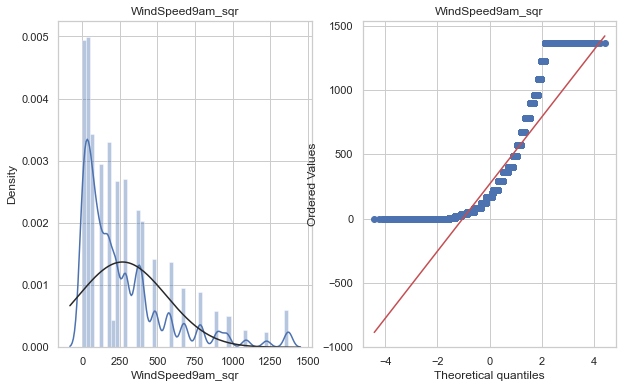

skewness is 0.21041766077613225


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


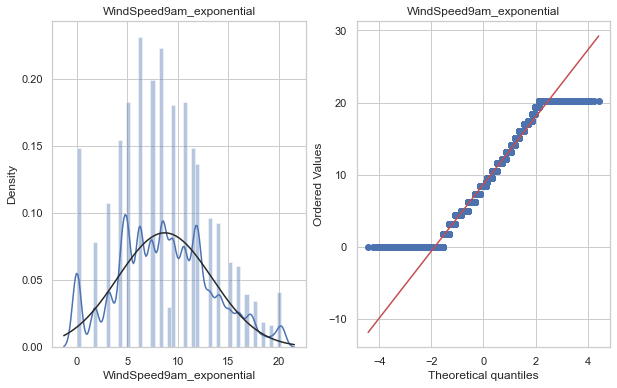

skewness is -0.8679657283228339


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


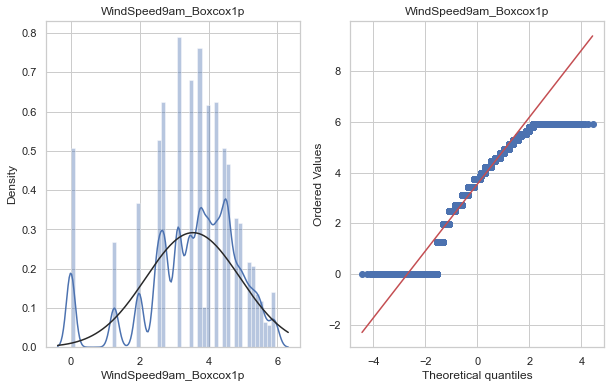

In [143]:
for i in ['WindSpeed9am']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [144]:
# Exponential transformation is better for WinSpeed9am

skewness is 0.21041766077613225


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


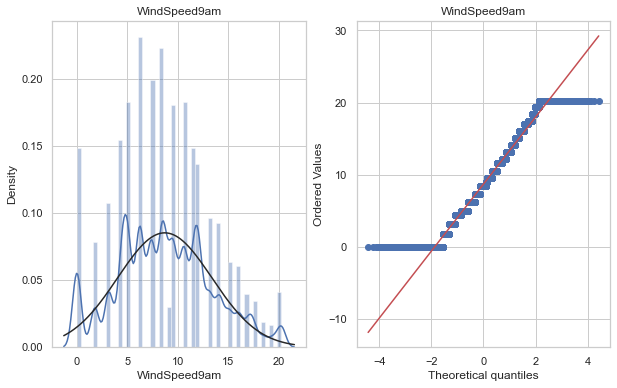

In [145]:
df2['WindSpeed9am']=df2['WindSpeed9am']**(1/1.2)
plot_data(df2,'WindSpeed9am')

In [146]:
#for WindSpeed3pm

skewness is -1.5879303902955582


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


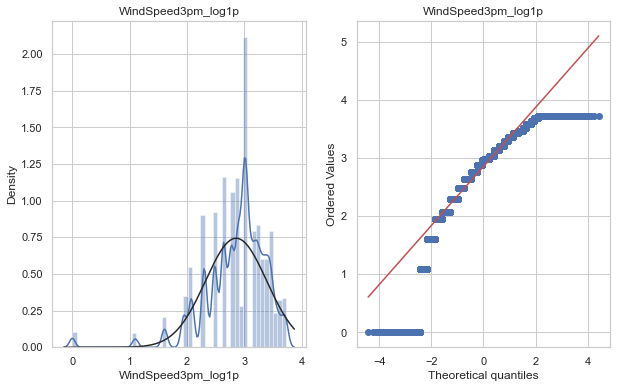

skewness is -0.5084153901458383


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


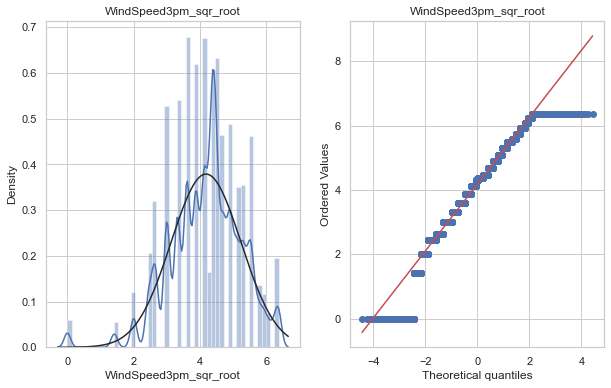

skewness is 1.4101516857935892


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


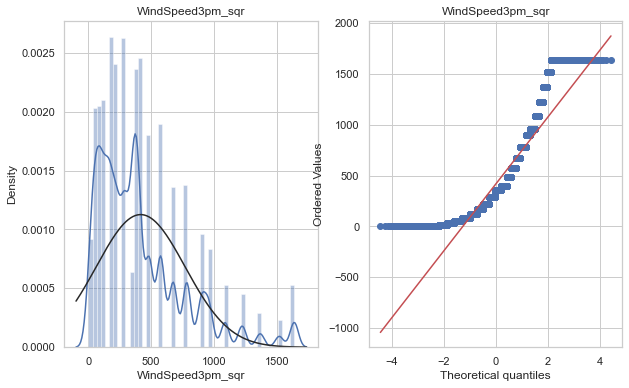

skewness is 0.17728179540113145


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


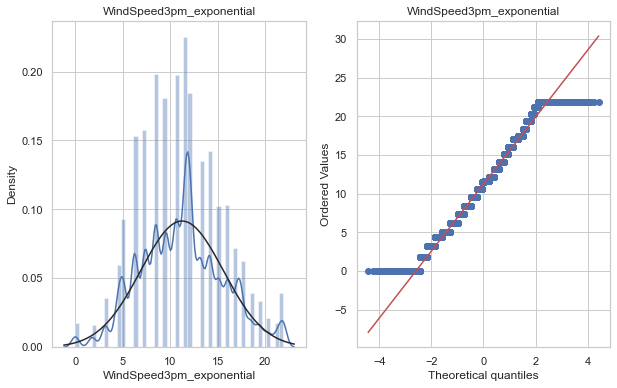

skewness is -0.8020488780456426


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


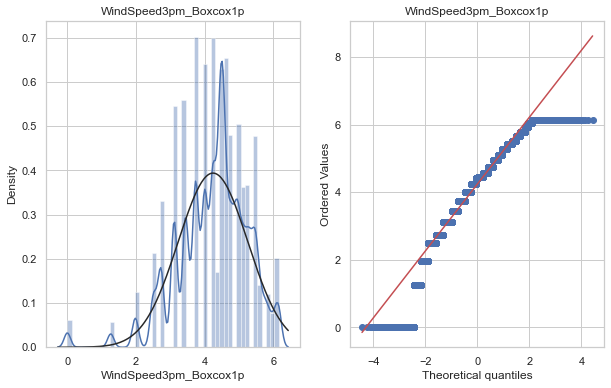

In [147]:
for i in ['WindSpeed3pm']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [148]:
## Exponential transformation is better for WinSpeed3pm

skewness is 0.17728179540113145


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


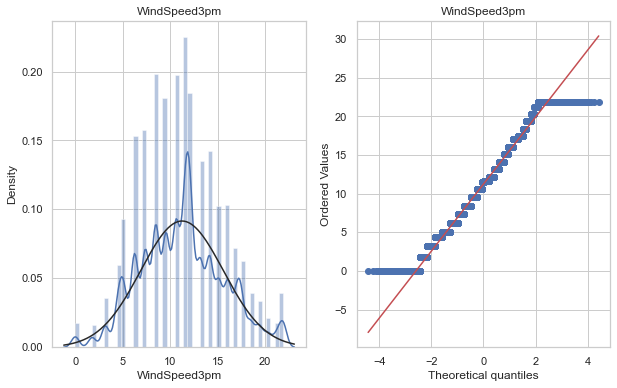

In [149]:
df2['WindSpeed3pm']=df2['WindSpeed3pm']**(1/1.2)
plot_data(df2,'WindSpeed3pm')

In [150]:
# for Humidity9am

skewness is -1.4576552601367603


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


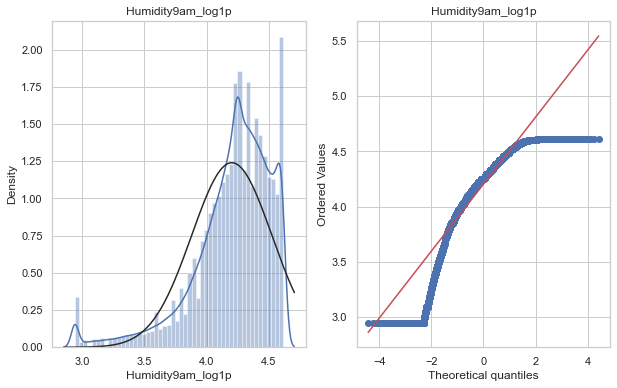

skewness is -0.8956087452480781


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


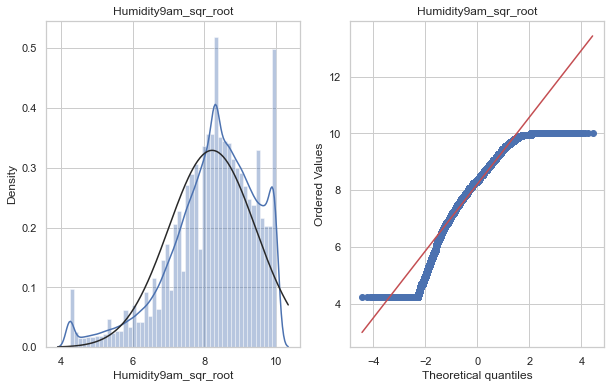

skewness is 0.20692139778817237


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


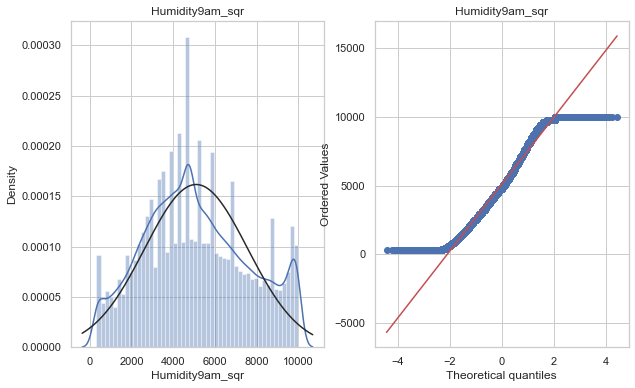

skewness is -0.5771545230278491


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


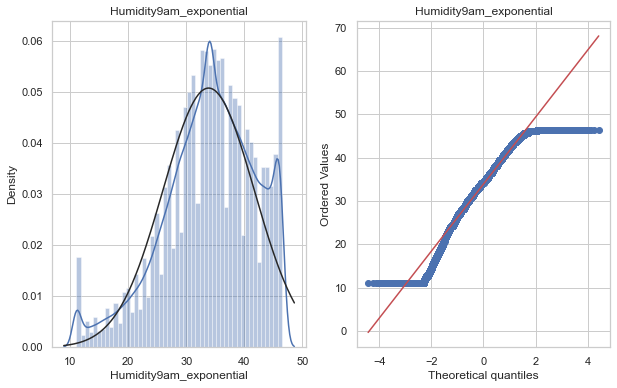

skewness is -1.1542708375720832


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


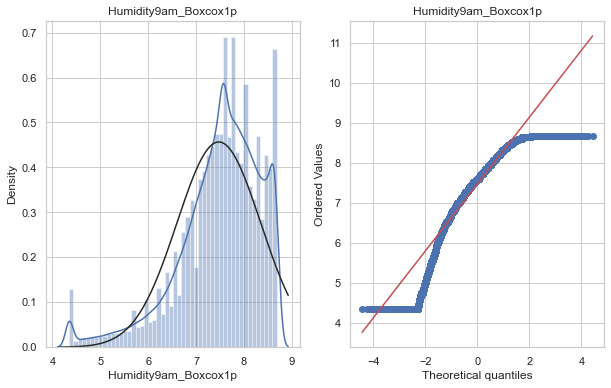

skewness is -0.10496904450761185


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


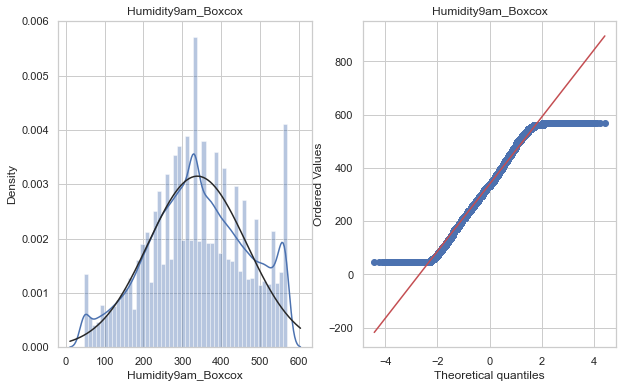

In [151]:
for i in ['Humidity9am']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    plot_data(df3,i+'_Boxcox')

In [152]:
# exponential transformation is better for Humidity9am

skewness is -0.5771545230278491


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


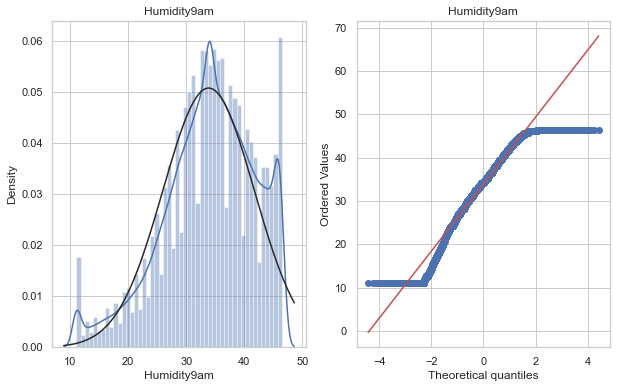

In [153]:
df2['Humidity9am']=df2['Humidity9am']**(1/1.2)
plot_data(df2,'Humidity9am')

In [154]:
# for Humidity3pm

In [155]:
df3 = df2.copy()

skewness is -1.3325379449611487


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


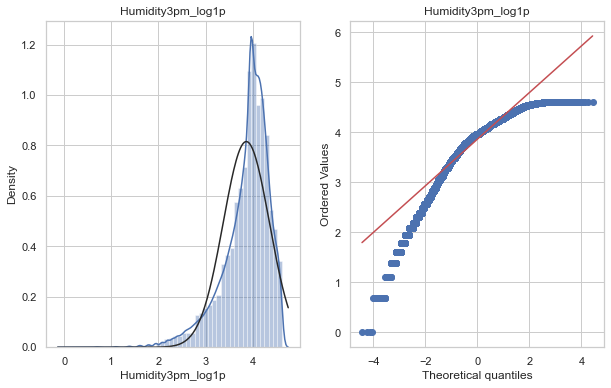

skewness is -0.5591937045261507


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


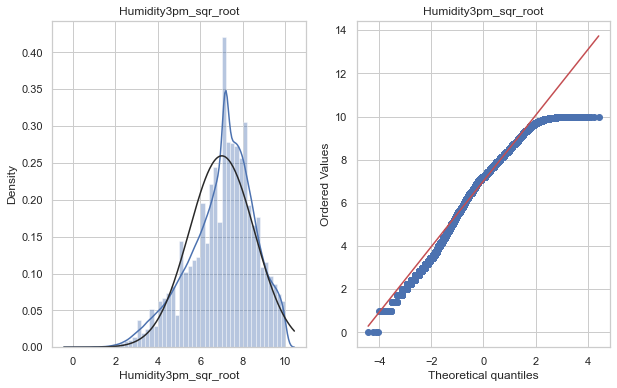

skewness is 0.9239734059035147


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


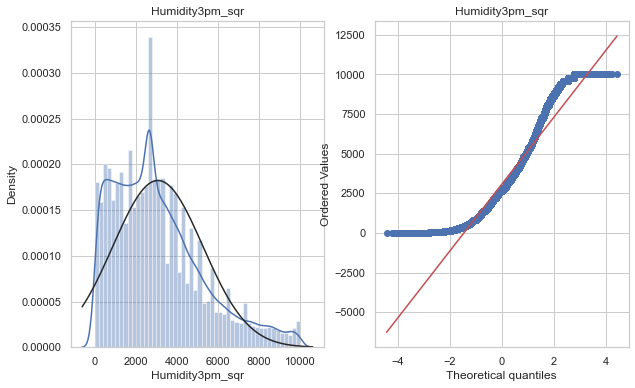

skewness is -0.1463933265692874


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


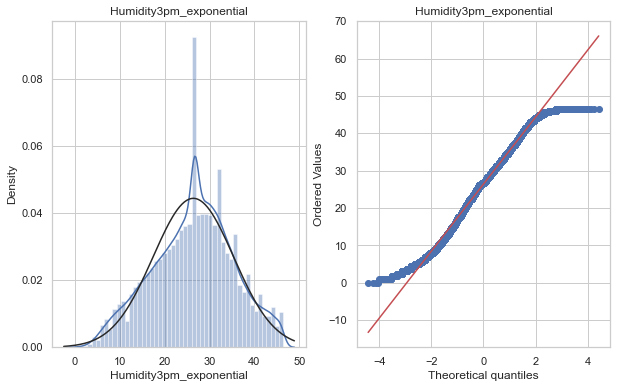

skewness is -0.8913460920038625


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


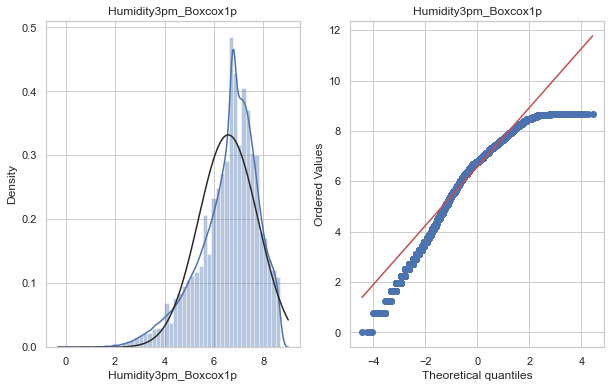

In [156]:
for i in ['Humidity3pm']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i]+0.0001)
    #plot_data(df3,i+'_Boxcox')

In [157]:
# exponential transformtion is better for Humidity3pm

skewness is -0.1463933265692874


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


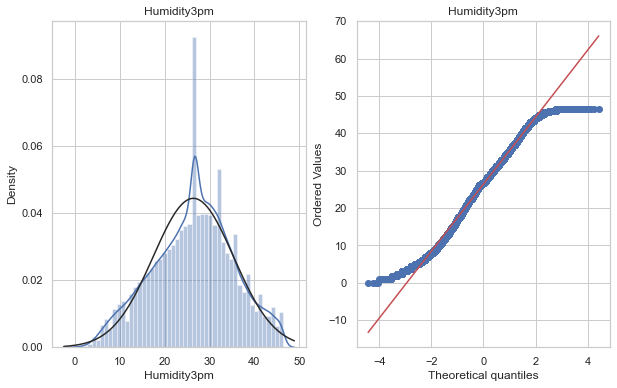

In [158]:
df2['Humidity3pm']=df2['Humidity3pm']**(1/1.2)
plot_data(df2,'Humidity3pm')

In [159]:
# for Pressure9am

skewness is -0.011865508304390739


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


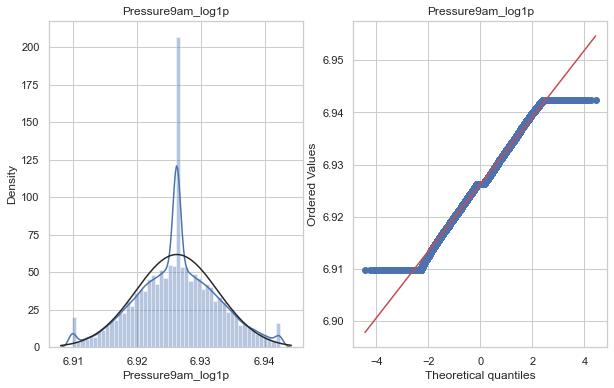

skewness is -0.002000769860184897


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


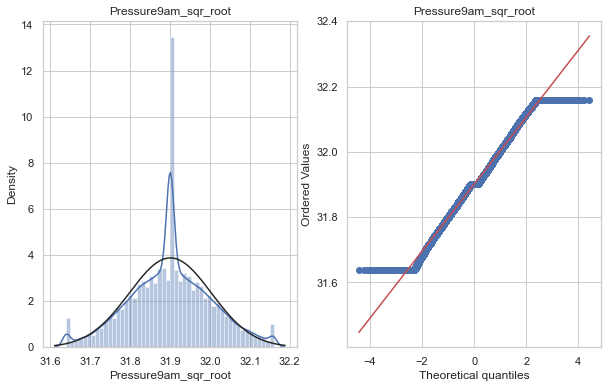

skewness is 0.027632342490095826


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


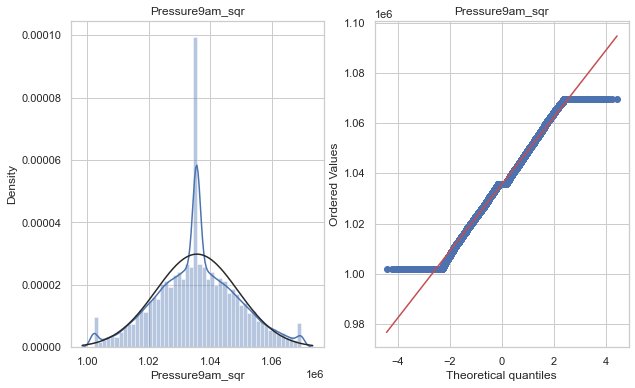

skewness is 0.004586866306552374


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


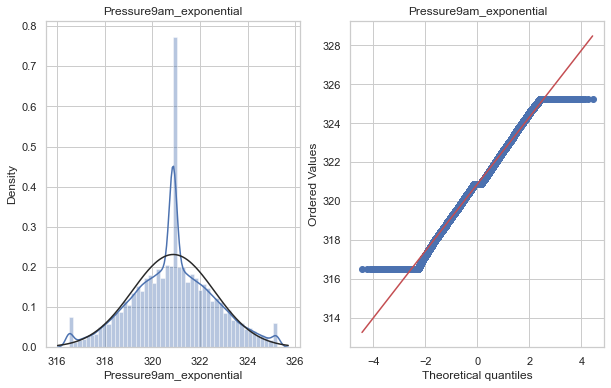

skewness is -0.006927883011827744


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


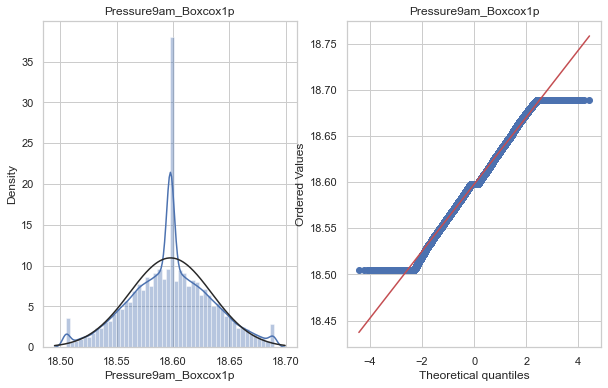

skewness is 5.378793174726806e-05


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


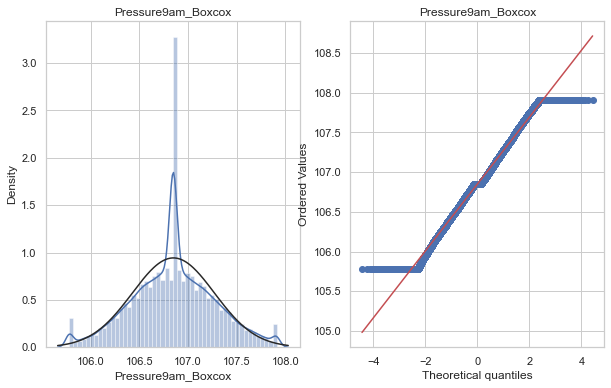

In [160]:
for i in ['Pressure9am']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    plot_data(df3,i+'_Boxcox')

In [161]:
# Exponential transformation is better for 

skewness is 0.004586866306552374


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


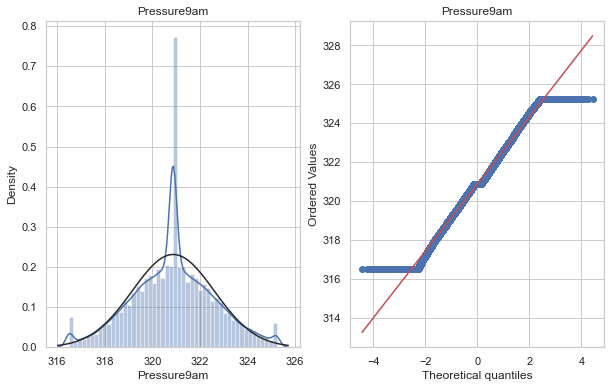

In [162]:
df2['Pressure9am']=df2['Pressure9am']**(1/1.2)
plot_data(df2,'Pressure9am')

In [163]:
#for Pressure3pm

skewness is 0.013950332782065334


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


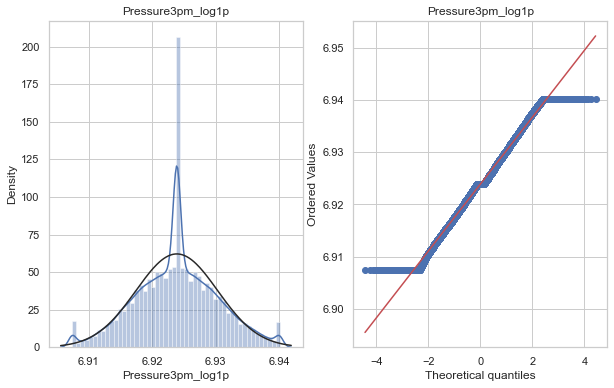

skewness is 0.02357496903251661


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


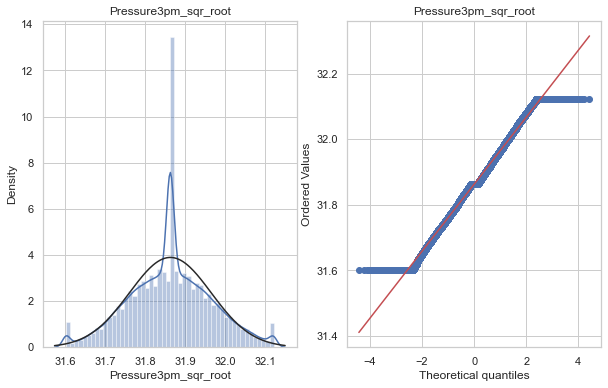

skewness is 0.05249217879289761


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


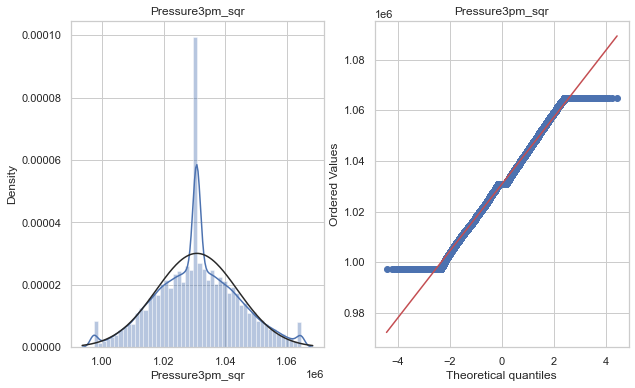

skewness is 0.03000276896559383


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


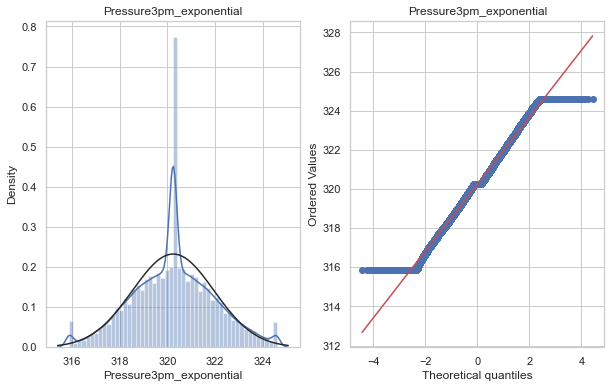

skewness is 0.01876768414428835


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


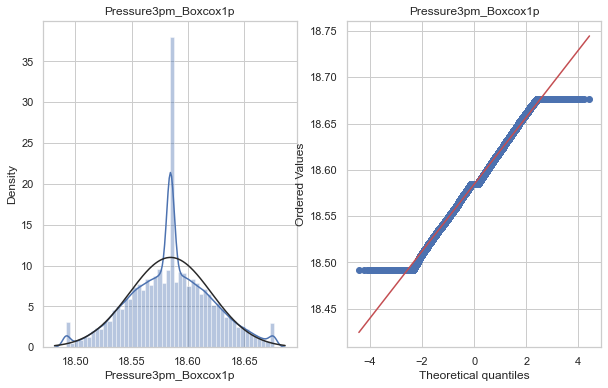

skewness is 0.0


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


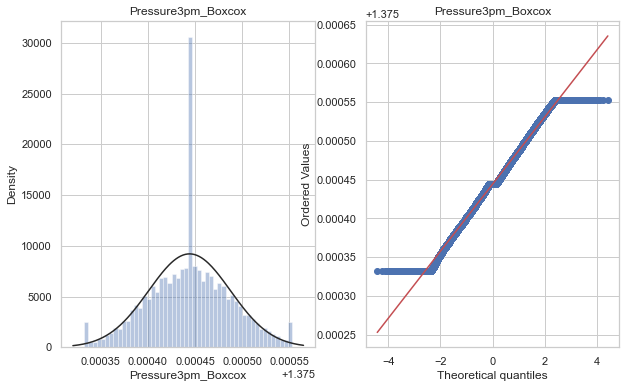

In [164]:
for i in ['Pressure3pm']:
    df3[i+'_log1p']=np.log1p(df3[i])
    plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    plot_data(df3,i+'_Boxcox')

In [165]:
#boxcox transformaation is better for Pressure3pm

skewness is 0.0


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


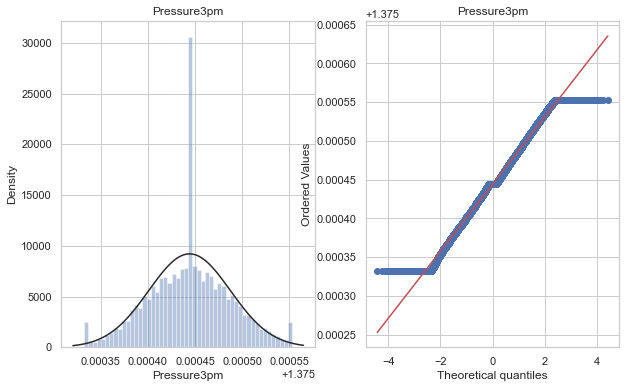

In [166]:
df2['Pressure3pm'],_=stat.boxcox(df2['Pressure3pm'])
plot_data(df2,'Pressure3pm')

In [167]:
continouse_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [168]:
# for Temp9am

skewness is -0.49239500532141006


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


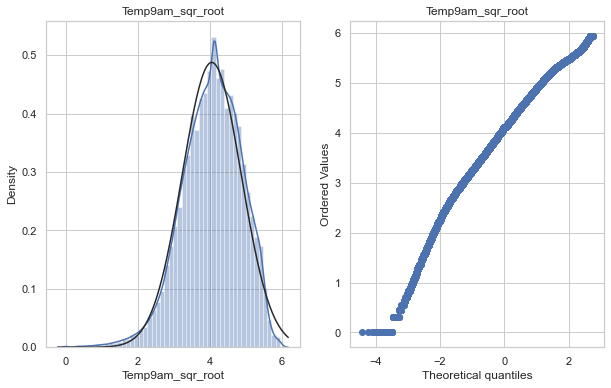

skewness is 0.9421117114812628


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


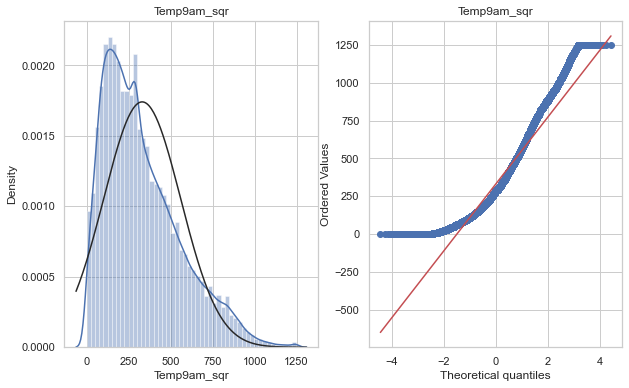

skewness is -0.03456664090286267


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


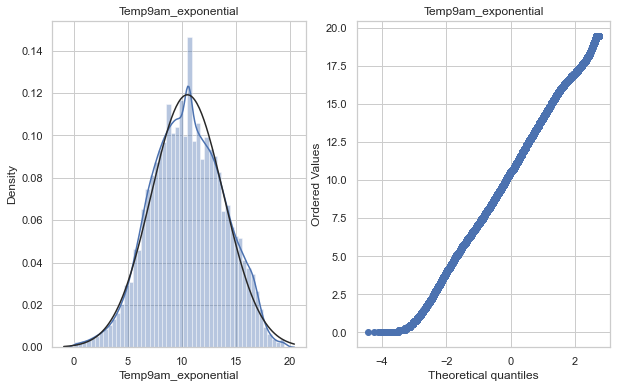

skewness is -1.0244610119291897


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


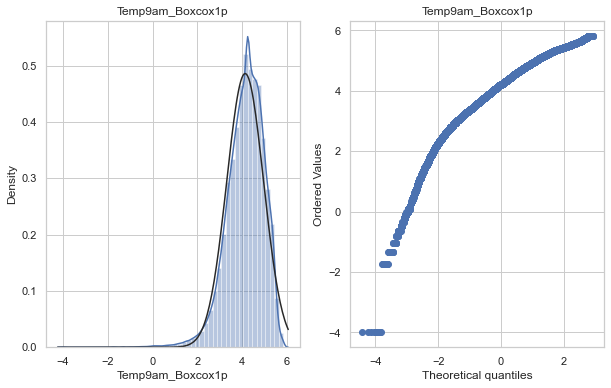

In [169]:
for i in ['Temp9am']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [170]:
# Exponential transformation is better for Temp9am

skewness is -0.03456664090286267


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


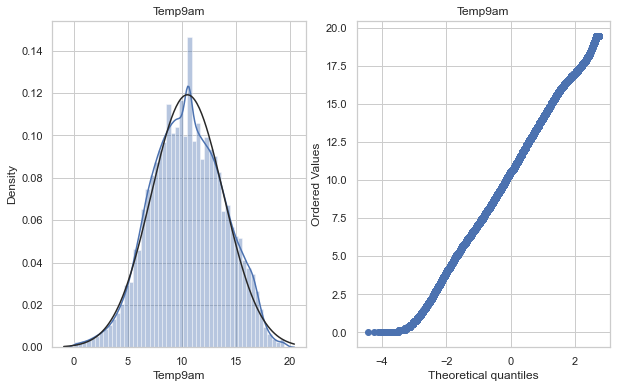

In [171]:
df2['Temp9am']=df2['Temp9am']**(1/1.2)
plot_data(df2,'Temp9am')

In [172]:
#for Temp3pm

skewness is -0.27772740216330066


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


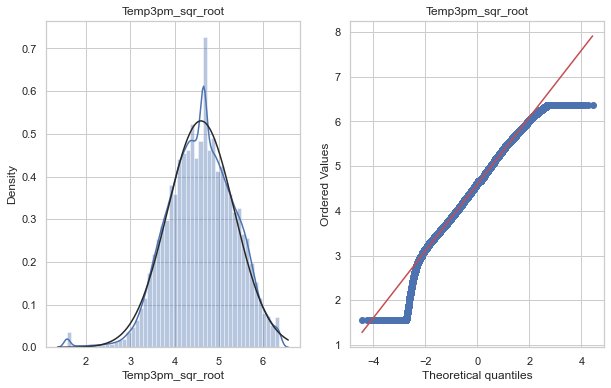

skewness is 1.0029669551566474


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


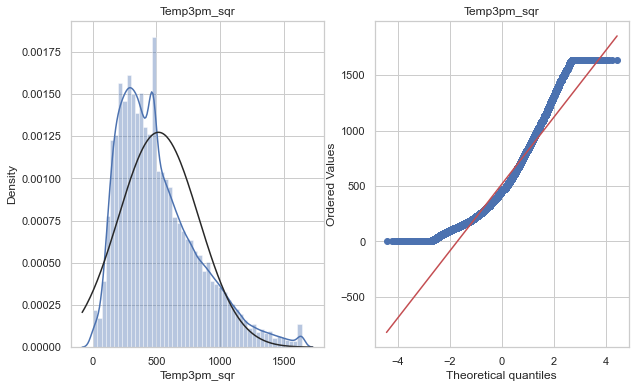

skewness is 0.10070283554578051


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


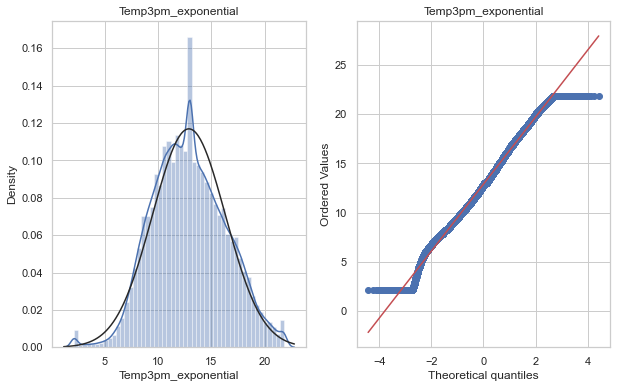

skewness is -0.5683850286644913


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


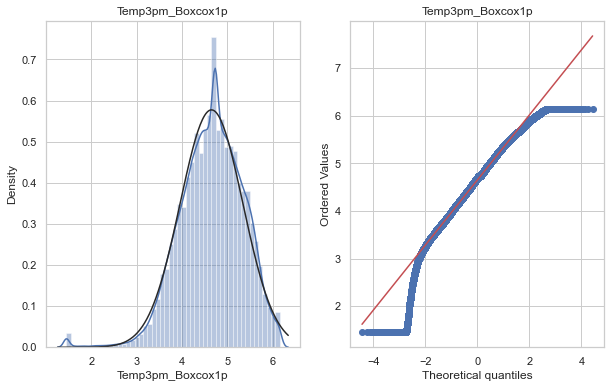

In [173]:
for i in ['Temp3pm']:
    #df3[i+'_log1p']=np.log1p(df3[i])
    #plot_data(df3,i+'_log1p')
    
    #df3[i+'_log']=np.log(df3[i])
    #plot_data(df3,i+'_log')
    
    #df3[i+'_reciprocal']=1/df3[i]
    #plot_data(df3,i+'_reciprocal')
    
    df3[i+'_sqr_root']=df3[i]**(1/2)
    plot_data(df3,i+'_sqr_root')
    
    df3[i+'_sqr']=df3[i]**2
    plot_data(df3,i+'_sqr')
    
    df3[i+'_exponential']=df3[i]**(1/1.2)
    plot_data(df3,i+'_exponential')
    
    df3[i+'_Boxcox1p']=boxcox1p(df3[i],0.25)
    plot_data(df3,i+'_Boxcox1p')
    
    #df3[i+'_Boxcox'],_=stat.boxcox(df3[i])
    #plot_data(df3,i+'_Boxcox')

In [174]:
## Exponential transformation is better for Temp3pm

skewness is 0.10070283554578051


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


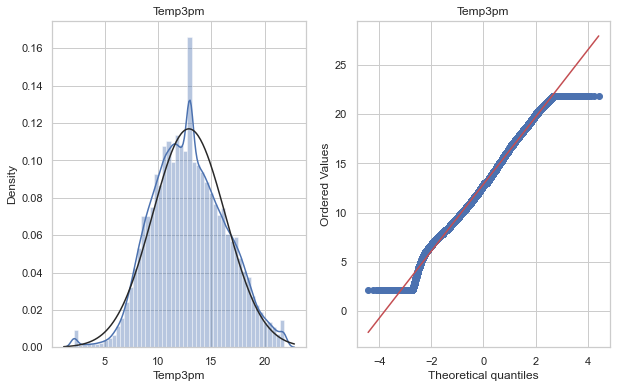

In [175]:
df2['Temp3pm']=df2['Temp3pm']**(1/1.2)
plot_data(df2,'Temp3pm')

### discreate Features

In [176]:
discreate_features

['Cloud9am', 'Cloud3pm']

In [177]:
df2['Cloud9am'].value_counts()

7.0    32438
1.0    25477
8.0    23862
0.0    14044
6.0    13283
2.0    10602
3.0     9583
5.0     9007
4.0     7161
9.0        3
Name: Cloud9am, dtype: int64

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

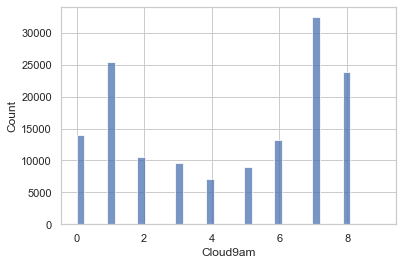

In [178]:
sns.histplot(data=df2['Cloud9am'])

In [179]:
df2['Cloud3pm'].value_counts()

7.0    30723
1.0    25253
8.0    21364
6.0    15192
2.0    12232
3.0    11724
5.0    11522
4.0     9027
0.0     8421
9.0        2
Name: Cloud3pm, dtype: int64

In [180]:
# 9.0 is like an outlier and it is like a mistake

In [181]:
df2['Cloud3pm'] = np.where(df2['Cloud3pm']>8,8,df2['Cloud3pm'])

In [182]:
df2['Cloud9am'] = np.where(df2['Cloud9am']>8,8,df2['Cloud9am'])

### Categorical Features

In [183]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [184]:
len(df2['Date'].unique())

3436

In [185]:
#Date

In [186]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [187]:
df2['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [188]:
df2['Month'] = df2['Date'].dt.month

In [189]:
df2['Day'] = df2['Date'].dt.day

In [190]:
df2.head()

Date Location    MinTemp    MaxTemp  Rainfall  Evaporation   Sunshine  \
0 2008-12-01   Albury   8.694688  13.589273       0.6     2.263869  57.554920   
1 2008-12-02   Albury   5.301024  14.668806       0.0     2.406140  69.201128   
2 2008-12-03   Albury   8.423478  14.960437       0.0     2.496163  59.559201   
3 2008-12-04   Albury   6.355600  16.068119       0.0     2.589230  77.023050   
4 2008-12-05   Albury  10.860881  18.099591       1.0     2.819463  88.580965   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W       8.870193          W        WNW     12.139245   
1         WNW       8.870193        NNW        WSW      3.174802   
2         WSW       9.074396          W        WSW     11.631293   
3          NE       6.419909         SE          E      7.376108   
4           W       8.553172        ENE         NW      5.061140   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0     14.131102    34.891151    13.142729   318.255596     1.375390       8.0   
1     13.142729    23.417682    14.620089   319.018654     1.375395       7.0   
2     15.105825    20.724608    17.019013   318.229277     1.375401       8.0   
3      6.240251    23.860366    10.079368   320.859017     1.375428       0.0   
4     12.139245    39.340953    18.425882   319.071265     1.375382       7.0   

   Cloud3pm    Temp9am    Temp3pm RainToday RainTomorrow  Month  Day  
0       0.0  10.549671  13.043088        No           No     12    1  
1       1.0  10.705502  14.278149        No           No     12    2  
2       2.0  12.642979  13.737467        No           No     12    3  
3       5.0  11.170317  15.347521        No           No     12    4  
4       8.0  11.015816  16.877070        No           No     12    5

In [191]:
df2.drop(['Date'],axis=1,inplace=True)

In [192]:
# Raintoday and Raintomorrow

In [193]:
dic = {'No':0 ,'Yes':1}

In [194]:
df2['RainToday'] = df2['RainToday'].map(dic)

In [195]:
df2['RainTomorrow'] = df2['RainTomorrow'].map(dic)

In [196]:
# WindGustDir

In [197]:
df2['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [198]:
dic_WindGustDir = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9,'S':10, 'NW':11, 'SE':12, 'ESE':13, 'E':14, 'SSW':15}

In [199]:
df2['WindGustDir']=df2['WindGustDir'].map(dic_WindGustDir)

In [200]:
df2['WindGustDir'].value_counts()

0     20241
12     9418
5      9313
9      9216
14     9181
10     9168
2      9069
7      8967
15     8736
1      8252
11     8122
8      8104
13     7372
3      7133
4      6620
6      6548
Name: WindGustDir, dtype: int64

In [201]:
# WindDir9am

In [202]:
df2['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [203]:
df2['WindDir9am'] = df2['WindDir9am'].map(dic_WindGustDir)

In [204]:
#WindDir3pm

In [205]:
df2['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [206]:
df2['WindDir3pm'] = df2['WindDir3pm'].map(dic_WindGustDir)

In [207]:
#Location

In [208]:
df2['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [209]:
len(df2['Location'].unique())


49

In [210]:
# I think now i want label encoding for this 
# but location have 49 unique values ..it makes model assume there is an location order which affet to rain (missundrstand)
# i need to get location order which has a high probability for rain tomorrow

In [211]:
df_location = df2.groupby(['Location'])['RainTomorrow'].mean().sort_values(ascending=False)

In [212]:
df_location

Location
Portland            0.363908
Walpole             0.315702
Cairns              0.312500
Dartmoor            0.306414
NorfolkIsland       0.305417
MountGambier        0.302632
Albany              0.296711
Witchcliffe         0.292124
CoffsHarbour        0.288800
MountGinini         0.269408
NorahHead           0.268975
Darwin              0.266834
Sydney              0.258672
SydneyAirport       0.257228
Ballarat            0.256908
GoldCoast           0.254934
Watsonia            0.245264
Newcastle           0.240540
Hobart              0.238334
Wollongong          0.234539
Williamtown         0.232635
Launceston          0.229934
Brisbane            0.222048
MelbourneAirport    0.217016
Adelaide            0.215471
Sale                0.213692
Albury              0.203289
Perth               0.202004
Melbourne           0.199186
Nuriootpa           0.196743
Penrith             0.195788
BadgerysCreek       0.193752
PerthAirport        0.188435
Tuggeranong         0.186904
Richm

In [213]:
list_location = df_location.index

In [214]:
list_location

Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 'Moree', 'Cobar', 'Mildura', 'AliceSprings',
       'Uluru', 'Woomera'],
      dtype='object', name='Location')

In [215]:
location_dic = {}
for index, val in enumerate(list_location):
    location_dic[val] = (48 - index)

In [216]:
location_dic

{'Portland': 48,
 'Walpole': 47,
 'Cairns': 46,
 'Dartmoor': 45,
 'NorfolkIsland': 44,
 'MountGambier': 43,
 'Albany': 42,
 'Witchcliffe': 41,
 'CoffsHarbour': 40,
 'MountGinini': 39,
 'NorahHead': 38,
 'Darwin': 37,
 'Sydney': 36,
 'SydneyAirport': 35,
 'Ballarat': 34,
 'GoldCoast': 33,
 'Watsonia': 32,
 'Newcastle': 31,
 'Hobart': 30,
 'Wollongong': 29,
 'Williamtown': 28,
 'Launceston': 27,
 'Brisbane': 26,
 'MelbourneAirport': 25,
 'Adelaide': 24,
 'Sale': 23,
 'Albury': 22,
 'Perth': 21,
 'Melbourne': 20,
 'Nuriootpa': 19,
 'Penrith': 18,
 'BadgerysCreek': 17,
 'PerthAirport': 16,
 'Tuggeranong': 15,
 'Richmond': 14,
 'Bendigo': 13,
 'Canberra': 12,
 'WaggaWagga': 11,
 'Townsville': 10,
 'Katherine': 9,
 'PearceRAAF': 8,
 'SalmonGums': 7,
 'Nhil': 6,
 'Moree': 5,
 'Cobar': 4,
 'Mildura': 3,
 'AliceSprings': 2,
 'Uluru': 1,
 'Woomera': 0}

In [217]:
df2['Location']= df2["Location"].map(location_dic)

In [218]:
#from sklearn.preprocessing import LabelEncoder

In [219]:
#labelencoder = LabelEncoder()

In [220]:
#df2['Location'] = labelencoder.fit_transform(df2['Location'])

In [221]:
df2.head(10)

Location    MinTemp    MaxTemp  Rainfall  Evaporation   Sunshine  \
0        22   8.694688  13.589273       0.6     2.263869  57.554920   
1        22   5.301024  14.668806       0.0     2.406140  69.201128   
2        22   8.423478  14.960437       0.0     2.496163  59.559201   
3        22   6.355600  16.068119       0.0     2.589230  77.023050   
4        22  10.860881  18.099591       1.0     2.819463  88.580965   
5        22   9.338864  16.877070       0.2     2.714741  91.781738   
6        22   9.178676  14.620089       0.0     2.412413  72.021708   
7        22   5.479517  15.443985       0.0     2.489823  73.150126   
8        22   6.642167  17.912611       0.0     2.803990  94.662428   
9        22   8.532168  17.066275       1.4     2.730870  84.072258   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0            0       8.870193           0           1     12.139245   
1            1       8.870193           4           2      3.174802   
2            2       9.074396           0           2     11.631293   
3            3       6.419909          12          14      7.376108   
4            0       8.553172           8          11      5.061140   
5            1      10.023000           0           0     11.631293   
6            0       9.467383           7           0     12.139245   
7            0       7.874593           9           0      4.451018   
8            4      11.075287          12          11      5.061140   
9            0       6.987820          10           9      9.551598   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0     14.131102    34.891151    13.142729   318.255596     1.375390       8.0   
1     13.142729    23.417682    14.620089   319.018654     1.375395       7.0   
2     15.105825    20.724608    17.019013   318.229277     1.375401       8.0   
3      6.240251    23.860366    10.079368   320.859017     1.375428       0.0   
4     12.139245    39.340953    18.425882   319.071265     1.375382       7.0   
5     14.131102    28.203450    13.638707   318.650327     1.375378       8.0   
6     14.131102    25.615140    11.631293   318.755572     1.375397       1.0   
7     10.601666    25.178762    11.631293   319.755053     1.375410       8.0   
8     16.068119    22.527227     6.240251   318.571388     1.375366       1.0   
9      7.376108    29.479718    15.588457   318.071355     1.375380       1.0   

   Cloud3pm    Temp9am    Temp3pm  RainToday  RainTomorrow  Month  Day  
0       0.0  10.549671  13.043088          0             0     12    1  
1       1.0  10.705502  14.278149          0             0     12    2  
2       2.0  12.642979  13.737467          0             0     12    3  
3       5.0  11.170317  15.347521          0             0     12    4  
4       8.0  11.015816  16.877070          0             0     12    5  
5       5.0  12.441976  16.497376          0             0     12    6  
6       8.0  11.170317  14.424893          0             0     12    7  
7       7.0  10.236614  14.863354          0             0     12    8  
8       8.0  11.273080  17.113511          0             1     12    9  
9       3.0  12.189804  16.163705          1             0     12   10

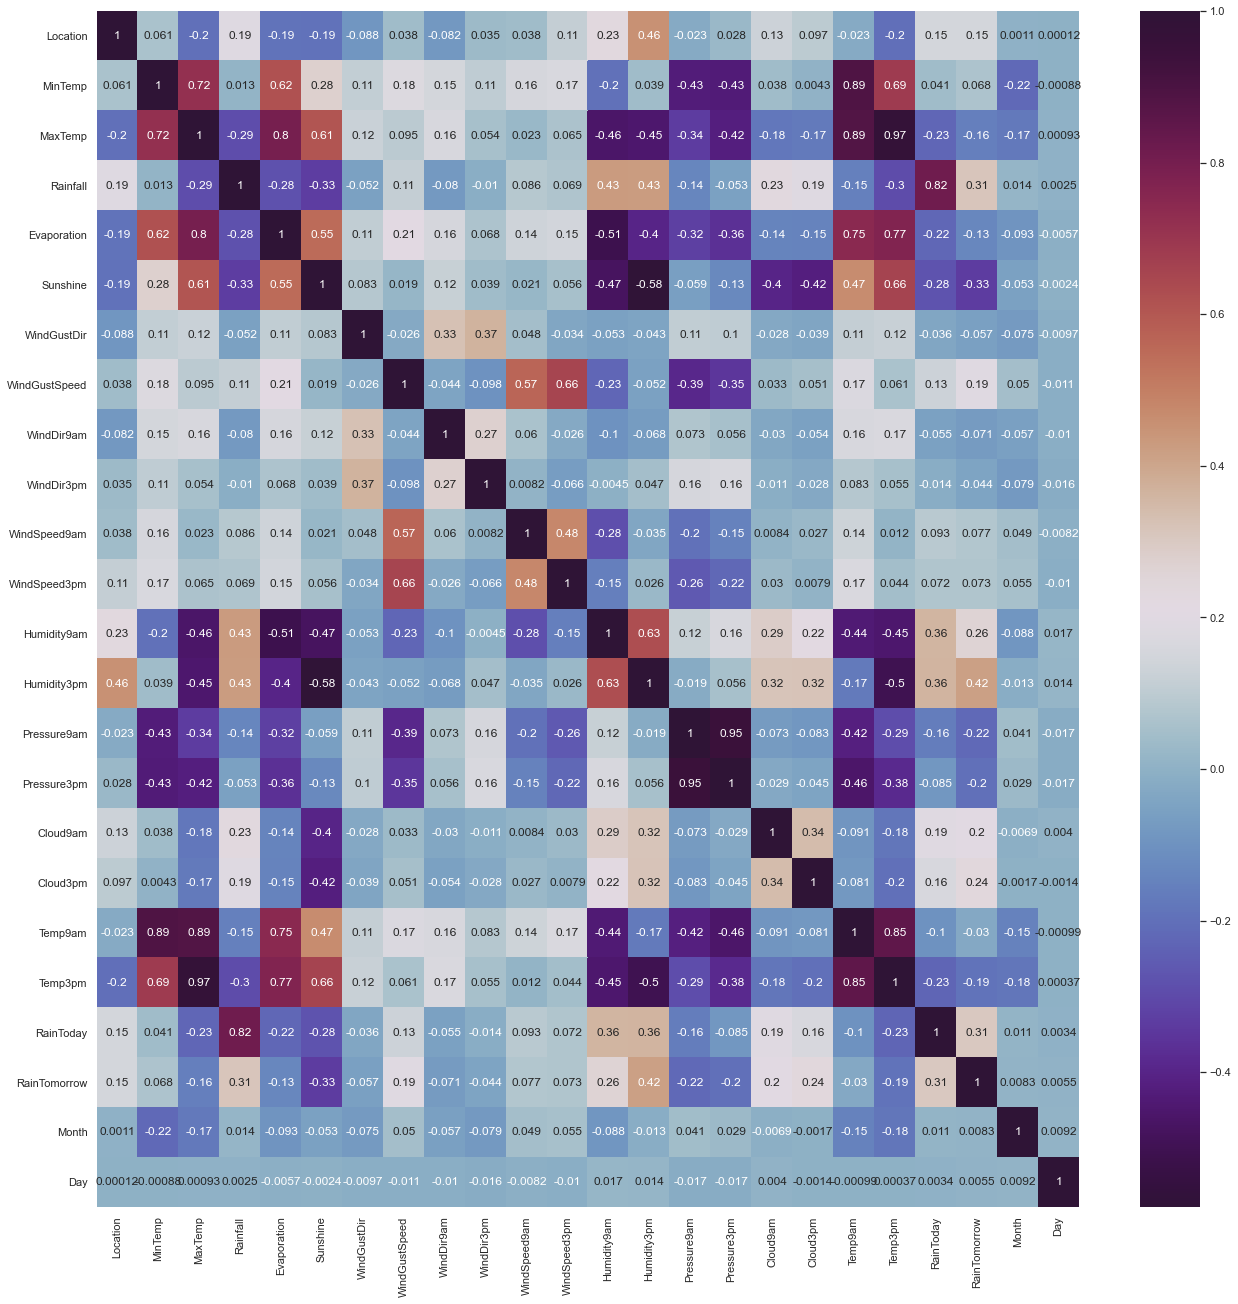

In [222]:
plt.figure(figsize=(22,22))
sns.heatmap(df2.corr(method = "spearman"),annot=True,cmap='twilight_shifted')
plt.show()

In [223]:
from scipy.stats import pearsonr
rho = df2.corr()
pval = df2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

Location   MinTemp   MaxTemp  Rainfall Evaporation  Sunshine  \
Location         1.0***   0.06***  -0.22***   0.16***    -0.21***   -0.2***   
MinTemp         0.06***    1.0***   0.71***   0.05***     0.59***   0.27***   
MaxTemp        -0.22***   0.71***    1.0***  -0.24***     0.78***    0.6***   
Rainfall        0.16***   0.05***  -0.24***    1.0***    -0.23***  -0.28***   
Evaporation    -0.21***   0.59***   0.78***  -0.23***      1.0***   0.54***   
Sunshine        -0.2***   0.27***    0.6***  -0.28***     0.54***    1.0***   
WindGustDir    -0.09***    0.1***   0.12***  -0.05***      0.1***   0.09***   
WindGustSpeed   0.05***   0.19***    0.1***   0.14***     0.22***   0.04***   
WindDir9am     -0.08***   0.14***   0.15***  -0.07***     0.15***   0.12***   
WindDir3pm      0.03***   0.09***   0.05***  -0.01***     0.06***   0.04***   
WindSpeed9am    0.04***   0.16***   0.02***   0.11***     0.15***   0.04***   
WindSpeed3pm    0.11***   0.17***   0.06***   0.08***     0.15***   0.05***   
Humidity9am     0.27***  -0.21***   -0.5***   0.37***    -0.53***  -0.48***   
Humidity3pm     0.46***   0.01***   -0.5***   0.39***    -0.44***  -0.58***   
Pressure9am    -0.03***  -0.42***  -0.31***  -0.18***    -0.31***  -0.07***   
Pressure3pm     0.02***  -0.43***   -0.4***   -0.1***    -0.35***  -0.13***   
Cloud9am        0.13***   0.04***  -0.17***   0.21***    -0.14***   -0.4***   
Cloud3pm         0.1***   0.01***  -0.16***   0.17***    -0.15***  -0.41***   
Temp9am        -0.03***   0.89***   0.88***   -0.1***     0.73***   0.46***   
Temp3pm        -0.23***   0.68***   0.97***  -0.25***     0.75***   0.65***   
RainToday       0.15***   0.05***  -0.23***    0.9***    -0.22***  -0.26***   
RainTomorrow    0.15***   0.08***  -0.16***   0.31***    -0.13***  -0.32***   
Month               0.0   -0.2***  -0.16***   0.01***    -0.08***  -0.04***   
Day                 0.0      -0.0       0.0       0.0        -0.0      -0.0   

              WindGustDir WindGustSpeed WindDir9am WindDir3pm WindSpeed9am  \
Location         -0.09***       0.05***   -0.08***    0.03***      0.04***   
MinTemp            0.1***       0.19***    0.14***    0.09***      0.16***   
MaxTemp           0.12***        0.1***    0.15***    0.05***      0.02***   
Rainfall         -0.05***       0.14***   -0.07***   -0.01***      0.11***   
Evaporation        0.1***       0.22***    0.15***    0.06***      0.15***   
Sunshine          0.09***       0.04***    0.12***    0.04***      0.04***   
WindGustDir        1.0***      -0.04***    0.33***    0.38***      0.04***   
WindGustSpeed    -0.04***        1.0***   -0.05***   -0.11***      0.58***   
WindDir9am        0.33***      -0.05***     1.0***    0.27***      0.06***   
WindDir3pm        0.38***      -0.11***    0.27***     1.0***          0.0   
WindSpeed9am      0.04***       0.58***    0.06***        0.0       1.0***   
WindSpeed3pm     -0.04***       0.66***   -0.03***   -0.08***       0.5***   
Humidity9am      -0.05***      -0.24***   -0.09***        0.0     -0.28***   
Humidity3pm      -0.04***      -0.06***   -0.07***    0.05***     -0.04***   
Pressure9am       0.12***      -0.42***    0.08***    0.16***     -0.21***   
Pressure3pm       0.11***      -0.38***    0.06***    0.17***     -0.17***   
Cloud9am         -0.03***       0.03***   -0.03***   -0.01***      0.01***   
Cloud3pm         -0.04***       0.05***   -0.06***   -0.03***      0.03***   
Temp9am           0.11***       0.19***    0.15***    0.07***      0.15***   
Temp3pm           0.12***       0.06***    0.16***    0.05***      0.01***   
RainToday        -0.03***       0.14***   -0.05***   -0.01***       0.1***   
RainTomorrow     -0.06***        0.2***   -0.07***   -0.04***      0.08***   
Month            -0.07***       0.06***   -0.05***   -0.08***      0.05***   
Day              -0.01***      -0.01***   -0.01***   -0.02***     -0.01***   

              WindSpeed3pm Humidity9am Humidity3pm Pressure9am Pressure3pm  \
Location  

In [224]:
pd.pivot_table(df2, index = 'RainTomorrow', values = df2.columns, aggfunc='mean' ,margins=True) 

Cloud3pm  Cloud9am        Day  Evaporation  Humidity3pm  \
RainTomorrow                                                            
0             4.174806  4.143939  15.686758     2.219308    24.377815   
1             5.695674  5.524736  15.803118     2.003825    33.570154   
All           4.513726  4.456251  15.724535     2.188333    26.312961   

              Humidity9am   Location    MaxTemp   MinTemp     Month  \
RainTomorrow                                                          
0               32.811087  23.460888  13.951448  7.940284  6.385683   
1               37.547141  28.523983  12.614838  8.556929  6.449258   
All             33.696859  24.609599  13.823036  8.092617  6.383715   

              Pressure3pm  Pressure9am  RainToday  Rainfall   Sunshine  \
RainTomorrow                                                             
0                1.375449   321.087328   0.152162  0.449807  72.514388   
1                1.375427   320.133448   0.457916  1.201339  38.790321   
All              1.375443   320.842954   0.221118  0.618837  65.965858   

                Temp3pm    Temp9am  WindDir3pm  WindDir9am  WindGustDir  \
RainTomorrow                                                              
0             13.236647  10.556671    7.721155    7.564099     7.160781   
1             11.672478  10.365219    7.227060    6.808200     6.486558   
All           13.043815  10.675663    7.642114    7.417875     7.023936   

              WindGustSpeed  WindSpeed3pm  WindSpeed9am  
RainTomorrow                                             
0                  8.100807     11.059422      8.509551  
1                  8.767639     11.874129      9.446299  
All                8.264054     11.292432      8.786283

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

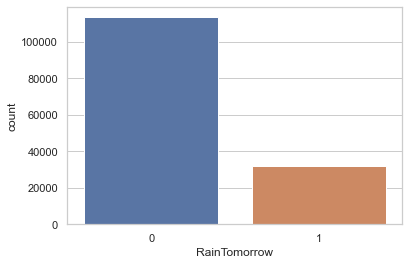

In [225]:
sns.countplot(df2['RainTomorrow'])

In [226]:
# it is an imbalance dataset we will have to do some oversampleing techniques

In [227]:
#sns.pairplot(df2)
#plt.show()

In [228]:
#g = sns.PairGrid(df2, diag_sharey=False)
#g.map_upper(sns.scatterplot, s=15)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=2)

In [229]:
df2 = df2.dropna(axis=0)

In [230]:
df2.to_csv('preprocessed.csv',index=False)